# Project: Risk Prediction Of Cardiovascular Disease

## Problem Statement:
*The aim of this project is to predict heart disease using data mining techniques and machine learning algorithms. This project implements classification models using scikit-learn: Logistic Regression, KNN, Decision Tree and Random Forest Model to investigate their performance on cardiovascular disease dataset.* 

### IMPORTING LIBRARIES

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### LOAD DATASET

In [11]:
df=pd.read_csv("CVD_cleaned.csv")

## Data Exploration

### .head()
*to  print the first five rows*

In [14]:
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poo,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150,32.66,14.54,Yes,0,30,16,12
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165,77.11,28.29,No,0,30,0,4
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163,88.45,33.47,No,4,12,3,16
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180,93.44,28.73,No,0,30,30,8
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191,88.45,24.37,Yes,0,8,4,0


### .tail()
*to print the last five rows* 

In [16]:
df.tail()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
308849,Very Good,Within the past year,Yes,No,No,No,No,No,No,m,25-29,168,81.65,29.05,No,4,30,8,0
308850,Fair,Within the past 5 years,Yes,No,No,No,No,Yes,No,Male,65-69,180,69.85,21.48,No,8,15,60,4
308851,Very Good,5 or more years ago,Yes,No,No,No,Yes,"Yes, but female told only during pregnancy",No,Female,30-34,157,61.23,24.69,Yes,4,40,8,4
308852,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,65-69,183,79.38,23.73,No,3,30,12,0
308853,Excellent,Within the past year,Yes,No,No,No,No,No,No,Female,45-49,160,81.19,31.71,No,1,5,12,1


### .shape
*to check the shape of given dataset*

In [18]:
df.shape

(308854, 19)

***dataset contains 308854 rows and 19 columns***

### .info()
*to check the information of given dataset*

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       308854 non-null  object 
 2   Exercise                      308854 non-null  object 
 3   Heart_Disease                 308854 non-null  object 
 4   Skin_Cancer                   308854 non-null  object 
 5   Other_Cancer                  308854 non-null  object 
 6   Depression                    308854 non-null  object 
 7   Diabetes                      308854 non-null  object 
 8   Arthritis                     308854 non-null  object 
 9   Sex                           308854 non-null  object 
 10  Age_Category                  308854 non-null  object 
 11  Height_(cm)                   308854 non-null  int64  
 12  Weight_(kg)                   308854 non-nul

***dataset contains 0 null values, 7 Numerical Columns, 12 Categorical Columns***

### .describe()
*to find the summary statistics of numerical columns*

In [24]:
df.describe()

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
count,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000
mean,170.615249,83.588655,28.626211,5.096366,29.835200,15.110441,6.296616
std,10.658026,21.343210,6.522323,8.199763,24.875735,14.926238,8.582954
min,91.000000,24.950000,12.020000,0.000000,0.000000,0.000000,0.000000
25%,163.000000,68.040000,24.210000,0.000000,12.000000,4.000000,2.000000
50%,170.000000,81.650000,27.440000,1.000000,30.000000,12.000000,4.000000
75%,178.000000,95.250000,31.850000,6.000000,30.000000,20.000000,8.000000
max,241.000000,293.020000,99.330000,30.000000,120.000000,128.000000,128.000000


### .isnull().sum()
*to find the sum of null values in columns*

In [26]:
df.isnull().sum()

General_Health                  0
Checkup                         0
Exercise                        0
Heart_Disease                   0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age_Category                    0
Height_(cm)                     0
Weight_(kg)                     0
BMI                             0
Smoking_History                 0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
FriedPotato_Consumption         0
dtype: int64

### .isnull().sum().sum()
*to find the total sum of null values in dataset*

In [28]:
df.isnull().sum().sum()

0

### .duplicated().sum()
*to find the sum of duplicates values in dataset*

In [30]:
df.duplicated().sum()

80

***dataset contains 80 duplicate values*** 

In [32]:
#droping duplicate values from dataset:-
df.drop_duplicates(inplace=True)

In [33]:
df.duplicated().sum()

0

### Identifying categorical columns in a DataFrame and printing their unique values.

In [35]:
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\nUnique values in {col}:")
    print(df[col].unique())


Unique values in General_Health:
['Poo' 'Very Good' 'Poor' 'Good' 'Fair' 'Excellent' 'poo']

Unique values in Checkup:
['Within the past 2 years' 'Within the past year' '5 or more years ago'
 'Within the past 5 years' 'Never']

Unique values in Exercise:
['No' 'Yes']

Unique values in Heart_Disease:
['No' 'Yes']

Unique values in Skin_Cancer:
['No' 'Yes']

Unique values in Other_Cancer:
['No' 'Yes']

Unique values in Depression:
['No' 'Yes']

Unique values in Diabetes:
['No' 'Yes' 'No, pre-diabetes or borderline diabetes'
 'Yes, but female told only during pregnancy']

Unique values in Arthritis:
['Yes' 'No']

Unique values in Sex:
['Female' 'Male' 'F' 'M' 'm']

Unique values in Age_Category:
['70-74' '60-64' '75-79' '80+' '65-69' '50-54' '45-49' '18-24' '30-34'
 '55-59' '35-39' '40-44' '25-29']

Unique values in Smoking_History:
['Yes' 'No']


### Correcting data inconsistencies

In [37]:
df['General_Health'] = df['General_Health'].replace({'poo': 'Poor'})
df['General_Health'] = df['General_Health'].replace({'Poo': 'Poor'})

In [38]:
df['Diabetes'] = df['Diabetes'].replace({'No, pre-diabetes or borderline diabetes': 'Other'})
df['Diabetes'] = df['Diabetes'].replace({'Yes, but female told only during pregnancy': 'Other'})

In [39]:
df['Sex'] = df['Sex'].replace({'F': 'Female'})
df['Sex'] = df['Sex'].replace({'m': 'Male'})
df['Sex'] = df['Sex'].replace({'M': 'Male'})

## EDA

### Measure of Central Tendency- Mean, Median, Mode

In [42]:
num_cols = df.select_dtypes(include=['number']).columns

In [43]:
ct = pd.DataFrame({"Mean": df[num_cols].mean(),"Median": df[num_cols].median(),"Mode": df[num_cols].mode().iloc[0]})
ct

,Mean,Median,Mode
Height_(cm),170.615220,170.00,168.00
Weight_(kg),83.590399,81.65,90.72
BMI,28.626813,27.44,26.63
Alcohol_Consumption,5.097557,1.00,0.00
Fruit_Consumption,29.834290,30.00,30.00
Green_Vegetables_Consumption,15.109517,12.00,30.00
FriedPotato_Consumption,6.297237,4.00,4.00


## Data Visualization

### Univariate Analysis

***COUNTPLOT***

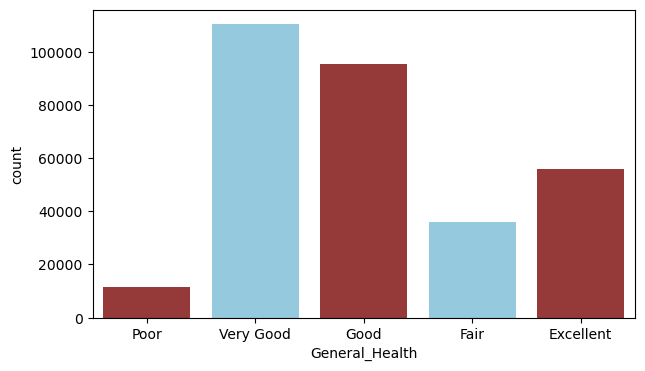

In [47]:
plt.figure(figsize=(7,4))
sns.countplot(data=df, x='General_Health', palette=['brown','skyblue'])
plt.show()

***the countplot shows that most individuals report their general health as either "Very Good" or "Good", while very few rate it as "Poor".***

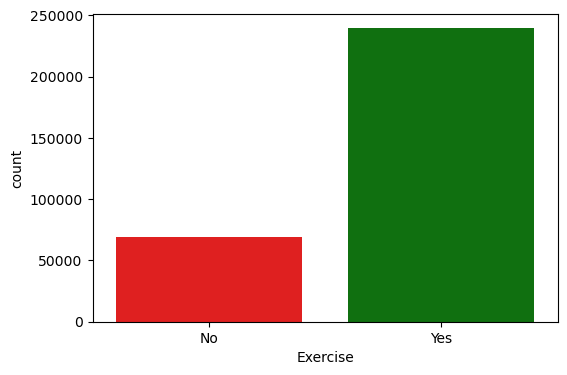

In [49]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Exercise',palette=['r','g'])
plt.show()

***the countplot shows that a majority of individuals engage in physical exercise, while a smaller portion do not.***

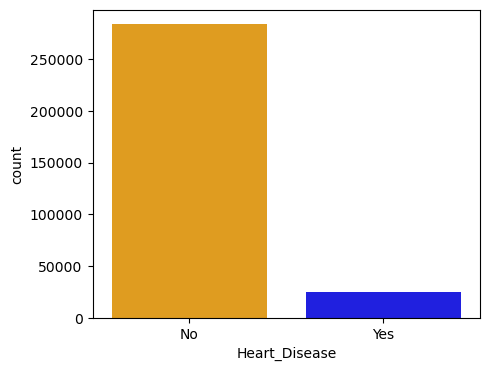

In [51]:
plt.figure(figsize=(5,4))
sns.countplot(data=df, x='Heart_Disease',palette=['orange','blue'])
plt.show()

***the countplot shows that the majority of individuals in the dataset do not have heart disease, indicating a class imbalance.***

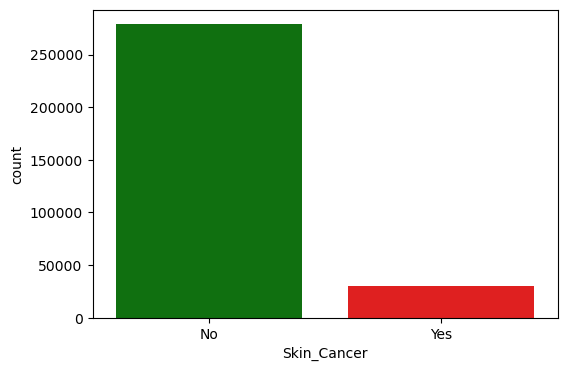

In [53]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Skin_Cancer',palette=['green','red'])
plt.show()

***the countplot indicates that the majority of individual do not have skin cancer, showing a class imbalance in data.***

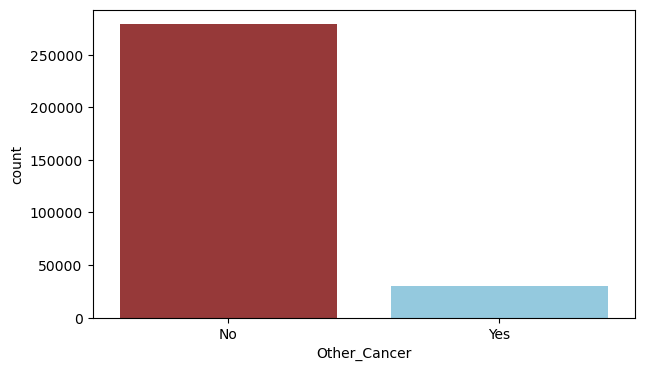

In [55]:
plt.figure(figsize=(7,4))
sns.countplot(data=df, x='Other_Cancer',palette=['brown','skyblue'])
plt.show()

***the countplot shows that most individuals do not have other type of cancer,indicating a class imbalance in dataset.***

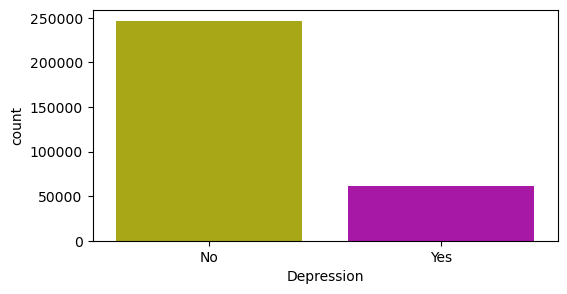

In [57]:
plt.figure(figsize=(6,3))
sns.countplot(data=df, x='Depression',palette=['y','m'])
plt.show()

***the countplot shows that a majority of individual in the dataset do not have depression, but moderate number still experiences.***

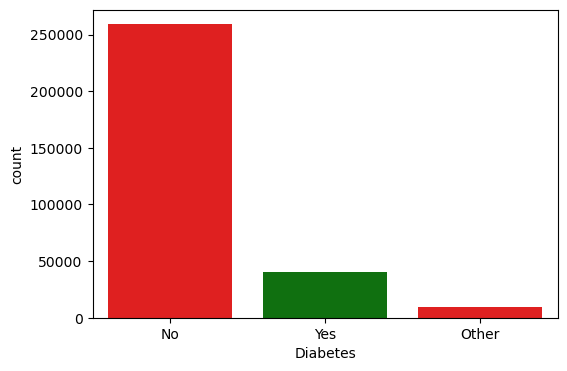

In [59]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Diabetes',palette=['r','g'])
plt.show()

***the countplot shows that the majority of individuals in the dataset do not have diabetes, while fewer reporting diabetes or related conditions.***

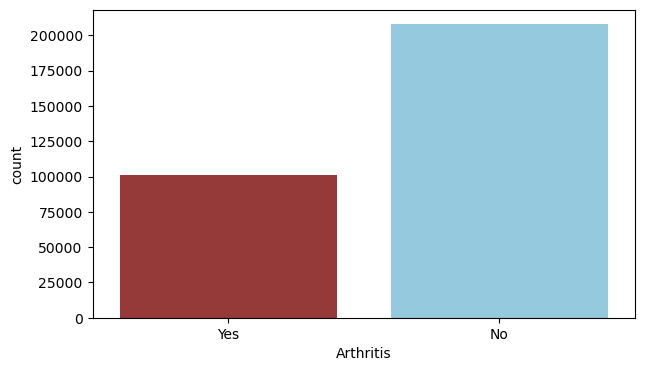

In [61]:
plt.figure(figsize=(7,4))
sns.countplot(data=df, x='Arthritis',palette=['brown','skyblue'])
plt.show()

***the countplot shows that most individuals do not have arthritis, though a considerable number do.***

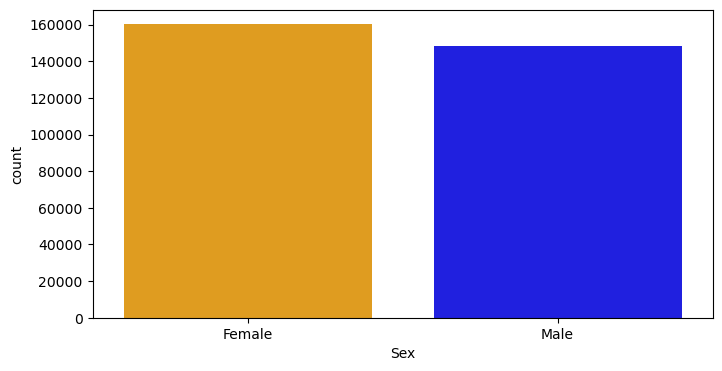

In [63]:
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='Sex',palette=['orange','blue'])
plt.show()

***the countplot shows that the dataset has more females than males.***

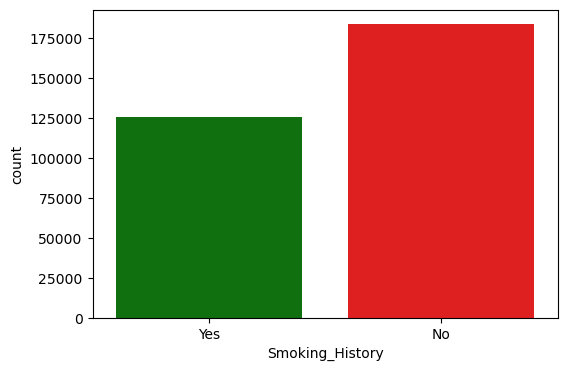

In [65]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Smoking_History',palette=['green','red'])
plt.show()

***the countplot shows that most individuals in the dataset do not have a history of smoking.***

***HISTOGRAM***

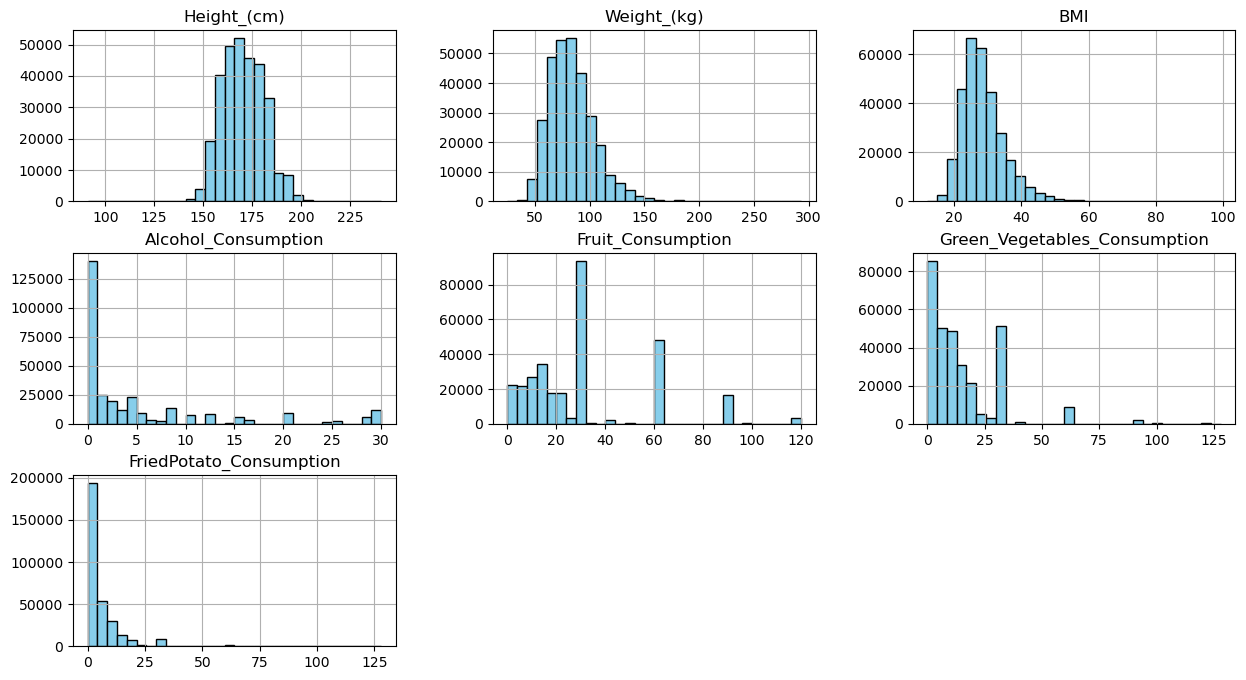

In [68]:
df[num_cols].hist(bins=30, figsize=(15, 8), color='skyblue', edgecolor='black')
plt.title("Histogram of Numerical Columns")
plt.show()

***the histograms indicate that most individuals in the dataset have average height, weight,and BMI, while the majority show low consumption of alcohol, fried potato,and green vegetables with moderate fruit consumption.***

***PIE CHART***

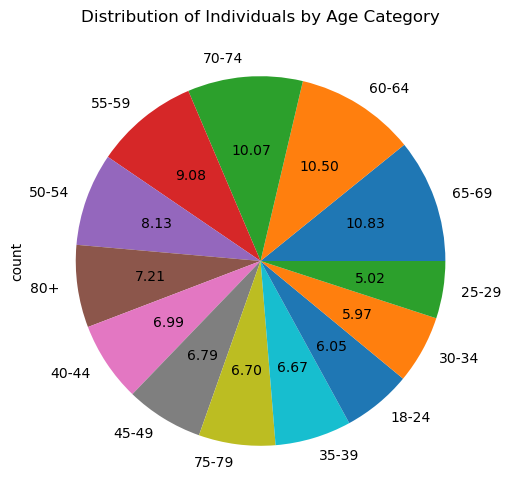

In [71]:
plt.figure(figsize=(9,6))
df['Age_Category'].value_counts().plot(kind='pie',autopct='%.2f')
plt.title("Distribution of Individuals by Age Category")
plt.show()

***the pie chart indicates that the majority of individuals in the dataset belongs to the age groups of 60-64 and 70-74, while other age groups fairly evenly spread.***

In [73]:
# Let's check the discrete and continous features:-
print("Categorical Columns:",categorical_cols)
print("Numerical Columns:",num_cols)

Categorical Columns: Index(['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer',
       'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex',
       'Age_Category', 'Smoking_History'],
      dtype='object')
Numerical Columns: Index(['Height_(cm)', 'Weight_(kg)', 'BMI', 'Alcohol_Consumption',
       'Fruit_Consumption', 'Green_Vegetables_Consumption',
       'FriedPotato_Consumption'],
      dtype='object')


## Bivariate Analysis

### Numerical VS. Numerical

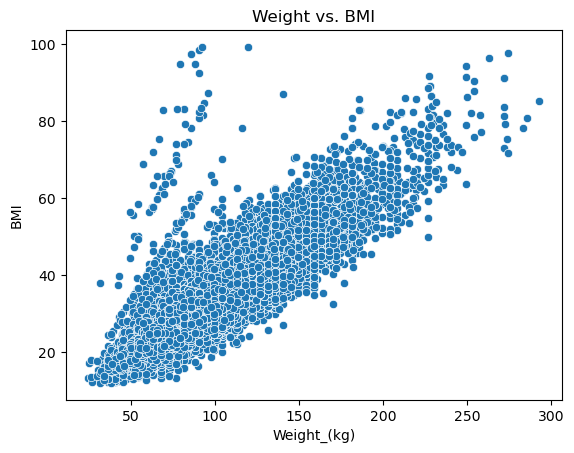

In [76]:
sns.scatterplot(x=df['Weight_(kg)'],y=df['BMI'])
plt.title("Weight vs. BMI")
plt.show()

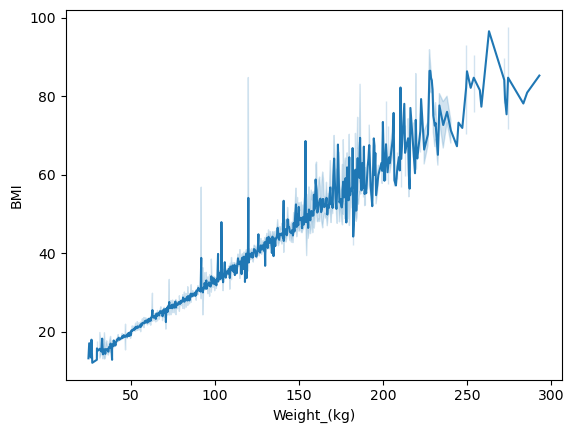

In [77]:
sns.lineplot(x=df['Weight_(kg)'],y=df['BMI'])
plt.show()

***the scatterplot and the lineplot shows a strong relationship between weight and BMI, indicating that BMI increases steadily with weight.***

### Categorical VS. Categorical

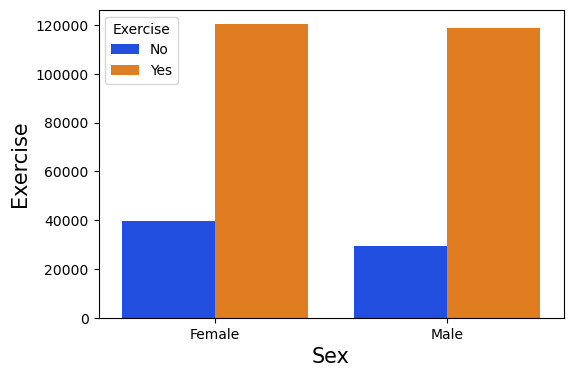

In [80]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Sex', hue="Exercise",palette='bright')
plt.xlabel('Sex', fontsize=15)
plt.ylabel('Exercise', fontsize=15)
plt.show()

***The countplot shows that a higher number of both males and females report exercising, with females having a slightly greater proportion of exercise than males.***

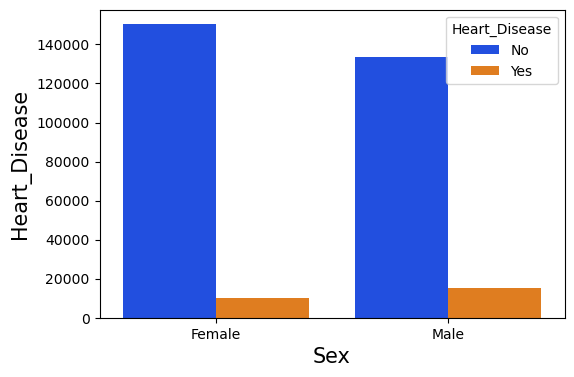

In [82]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Sex', hue="Heart_Disease",palette='bright')
plt.xlabel('Sex', fontsize=15)
plt.ylabel('Heart_Disease', fontsize=15)
plt.show()

***The countplot shows that heart disease is more prevalent among males than females, though the majority in both females and males do not report having heart disease.***

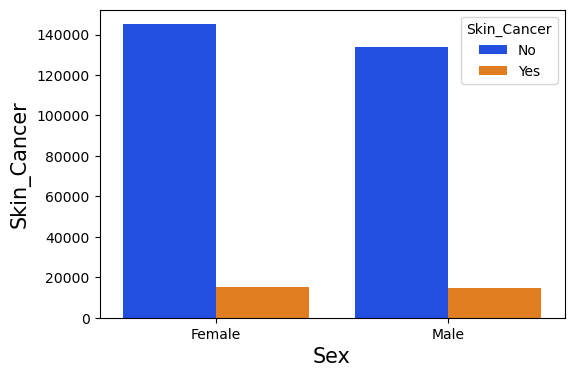

In [84]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Sex', hue="Skin_Cancer",palette='bright')
plt.xlabel('Sex', fontsize=15)
plt.ylabel('Skin_Cancer', fontsize=15)
plt.show()

***The countplot shows that skin cancer is relatively rare in both males and females, with slightly higher reported cases among females than males.***

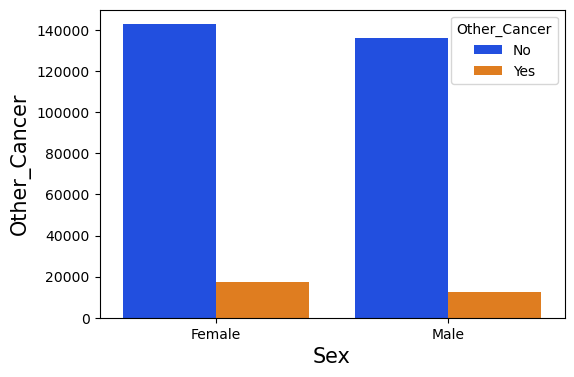

In [86]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Sex', hue="Other_Cancer",palette='bright')
plt.xlabel('Sex', fontsize=15)
plt.ylabel('Other_Cancer', fontsize=15)
plt.show()

***the countplot shows that the most males and females do not have other cancer, with only few having it, indicating class imbalance in the dataset.***

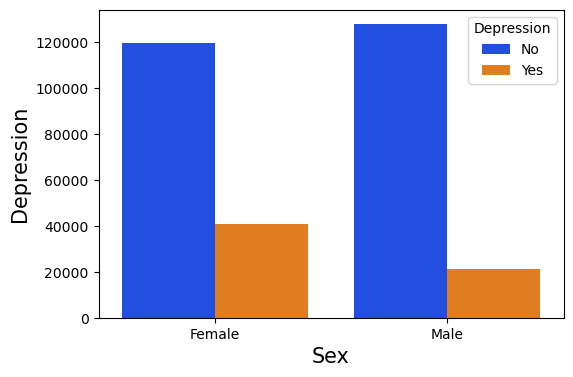

In [88]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Sex', hue="Depression",palette='bright')
plt.xlabel('Sex', fontsize=15)
plt.ylabel('Depression', fontsize=15)
plt.show()

***the countplot shows that more females report depression than males, although most individuals of both males and females do not have depression.***

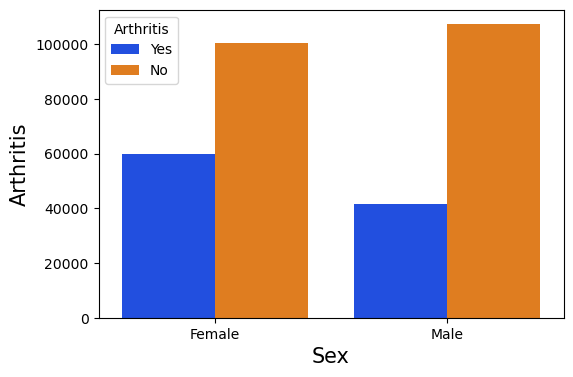

In [90]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Sex', hue="Arthritis",palette='bright')
plt.xlabel('Sex', fontsize=15)
plt.ylabel('Arthritis', fontsize=15)
plt.show()

***the countplot shows that more females have arthritis than males, but in both males and females, most individuals do not have arthritis.***

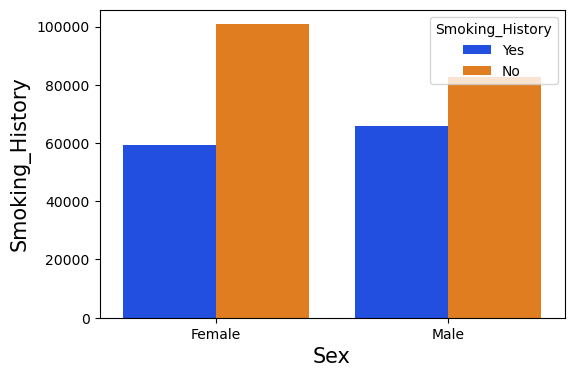

In [92]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Sex', hue="Smoking_History",palette='bright')
plt.xlabel('Sex', fontsize=15)
plt.ylabel('Smoking_History', fontsize=15)
plt.show()

***the countplot shows that more females do not have smoking history, while smoking and non-smoking counts are nearly balanced among males.***

### Numerical VS. Categorical

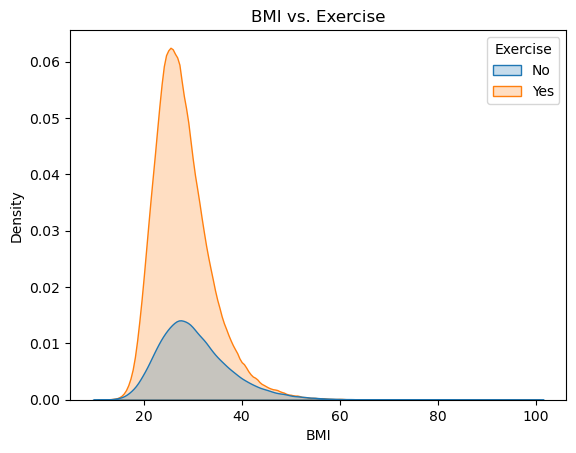

In [95]:
sns.kdeplot(data=df, x='BMI', hue='Exercise', fill=True)
plt.title("BMI vs. Exercise")
plt.show()

***the kde(kernal density estimate) plot shows that individuals who exercise tend to have lower BMI values compared to those who do not exercise.***

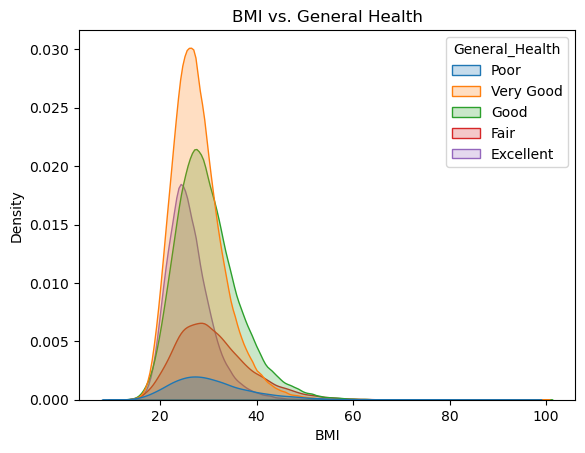

In [97]:
sns.kdeplot(data=df, x='BMI', hue='General_Health', fill=True)
plt.title("BMI vs. General Health")
plt.show()

***the kde plot shows that the individuals with better general health (Excellent/Very Good) tend to have lower BMI values,while higher BMI values are more associated with poor health rating.***

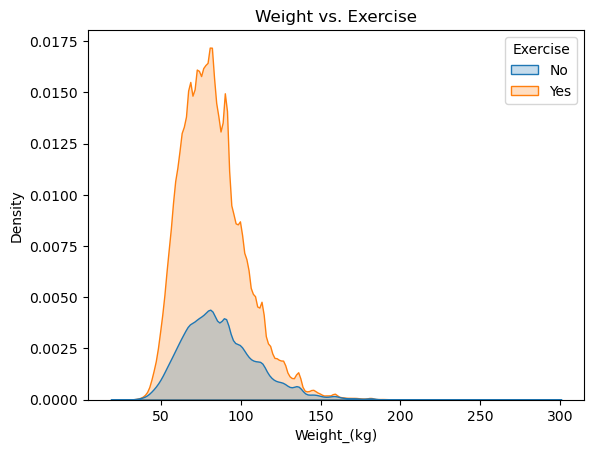

In [99]:
sns.kdeplot(data=df, x='Weight_(kg)', hue='Exercise', fill=True)
plt.title("Weight vs. Exercise")
plt.show()

***the kde plot shows that the individuals who exercise generally have lower body weights, while those who do not exercise tend to have higher weight distribution.***

### BOXPLOT
*to find outliers in given dataset*

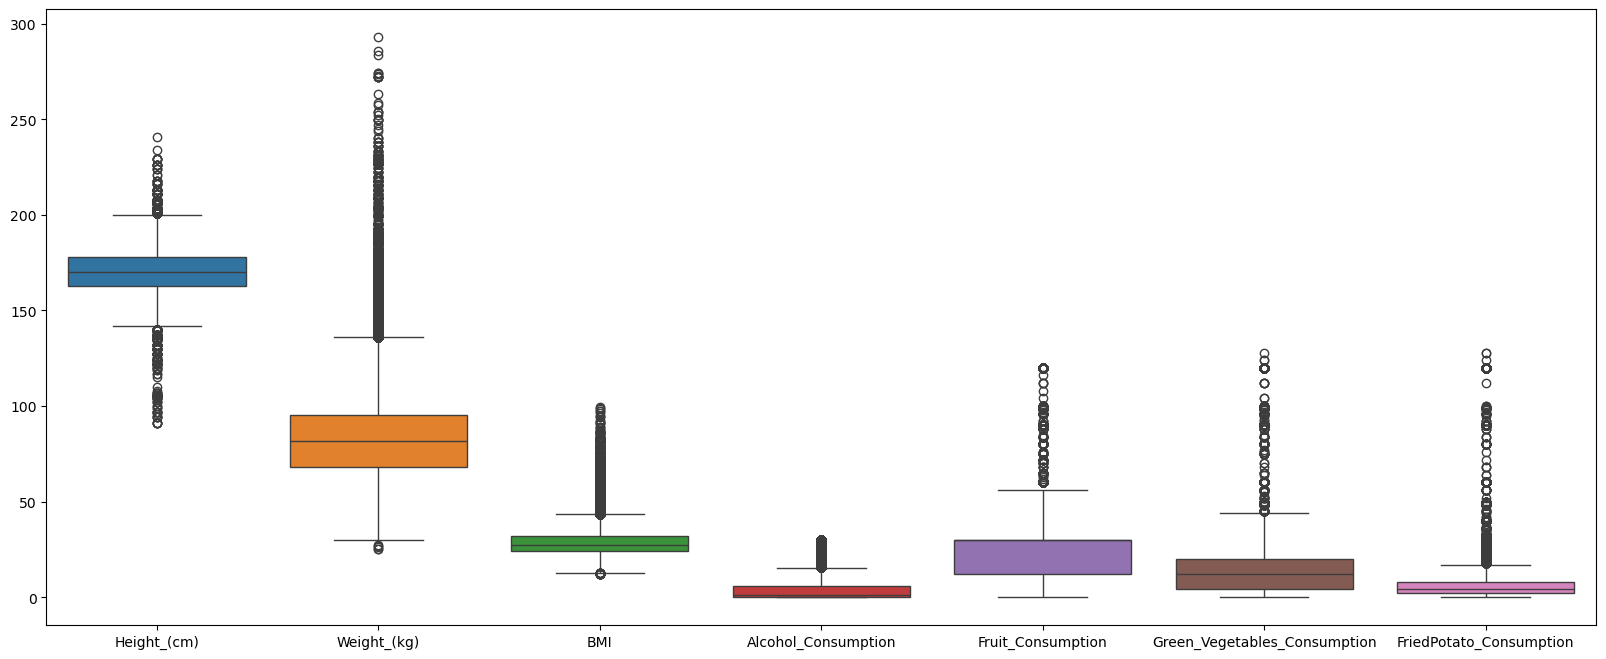

In [102]:
plt.figure(figsize=(20,8))
sns.boxplot(df)
plt.show()

***The boxplot shows that Height, Weight, and BMI have a wide range of values with many outliers, while the Alcohol, Fruit, Green Vegetable, and Fried Potato Consumption have smaller ranges but still include several outliers in the dataset.***

### Encoding

In [105]:
#importing libraries:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [106]:
df['General_Health']=encoder.fit_transform(df['General_Health'])
df['Checkup']=encoder.fit_transform(df['Checkup'])
df['Exercise']=encoder.fit_transform(df['Exercise'])
df['Heart_Disease']=encoder.fit_transform(df['Heart_Disease'])
df['Skin_Cancer']=encoder.fit_transform(df['Skin_Cancer'])
df['Other_Cancer']=encoder.fit_transform(df['Other_Cancer'])
df['Depression']=encoder.fit_transform(df['Depression'])
df['Diabetes']=encoder.fit_transform(df['Diabetes'])
df['Arthritis']=encoder.fit_transform(df['Arthritis'])
df['Sex']=encoder.fit_transform(df['Sex'])
df['Age_Category']=encoder.fit_transform(df['Age_Category'])
df['Smoking_History']=encoder.fit_transform(df['Smoking_History'])

### Treat Outliers

In [108]:
q1=df.quantile(0.25)
q1

General_Health                    1.00
Checkup                           4.00
Exercise                          1.00
Heart_Disease                     0.00
Skin_Cancer                       0.00
Other_Cancer                      0.00
Depression                        0.00
Diabetes                          0.00
Arthritis                         0.00
Sex                               0.00
Age_Category                      4.00
Height_(cm)                     163.00
Weight_(kg)                      68.04
BMI                              24.21
Smoking_History                   0.00
Alcohol_Consumption               0.00
Fruit_Consumption                12.00
Green_Vegetables_Consumption      4.00
FriedPotato_Consumption           2.00
Name: 0.25, dtype: float64

In [109]:
q3=df.quantile(0.75)
q3

General_Health                    4.00
Checkup                           4.00
Exercise                          1.00
Heart_Disease                     0.00
Skin_Cancer                       0.00
Other_Cancer                      0.00
Depression                        0.00
Diabetes                          0.00
Arthritis                         1.00
Sex                               1.00
Age_Category                      9.00
Height_(cm)                     178.00
Weight_(kg)                      95.25
BMI                              31.85
Smoking_History                   1.00
Alcohol_Consumption               6.00
Fruit_Consumption                30.00
Green_Vegetables_Consumption     20.00
FriedPotato_Consumption           8.00
Name: 0.75, dtype: float64

In [110]:
iqr=(q3-q1)
iqr

General_Health                   3.00
Checkup                          0.00
Exercise                         0.00
Heart_Disease                    0.00
Skin_Cancer                      0.00
Other_Cancer                     0.00
Depression                       0.00
Diabetes                         0.00
Arthritis                        1.00
Sex                              1.00
Age_Category                     5.00
Height_(cm)                     15.00
Weight_(kg)                     27.21
BMI                              7.64
Smoking_History                  1.00
Alcohol_Consumption              6.00
Fruit_Consumption               18.00
Green_Vegetables_Consumption    16.00
FriedPotato_Consumption          6.00
dtype: float64

In [111]:
h_low=q1['Height_(cm)']-(1.5*iqr['Height_(cm)'])
h_high=q3['Height_(cm)']+(1.5*iqr['Height_(cm)'])

In [112]:
h_df=df.copy()
h_df['Height_(cm)']=np.where(h_df['Height_(cm)']>h_high,
                    h_high,
                    np.where(h_df['Height_(cm)']<h_low,
                    h_low,
                    h_df['Height_(cm)']
    )
)

In [113]:
df.reset_index()

,index,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,0,3,2,0,0,0,0,0,0,1,0,10,150,32.66,14.54,1,0,30,16,12
1,1,4,4,0,1,0,0,0,2,0,0,10,165,77.11,28.29,0,0,30,0,4
2,2,4,4,1,0,0,0,0,2,0,0,8,163,88.45,33.47,0,4,12,3,16
3,3,3,4,1,1,0,0,0,2,0,1,11,180,93.44,28.73,0,0,30,30,8
4,4,2,4,0,0,0,0,0,0,0,1,12,191,88.45,24.37,1,0,8,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308769,308849,4,4,1,0,0,0,0,0,0,1,1,168,81.65,29.05,0,4,30,8,0
308770,308850,1,3,1,0,0,0,0,2,0,1,9,180,69.85,21.48,0,8,15,60,4
308771,308851,4,0,1,0,0,0,1,1,0,0,2,157,61.23,24.69,1,4,40,8,4
308772,308852,4,4,1,0,0,0,0,0,0,1,9,183,79.38,23.73,0,3,30,12,0


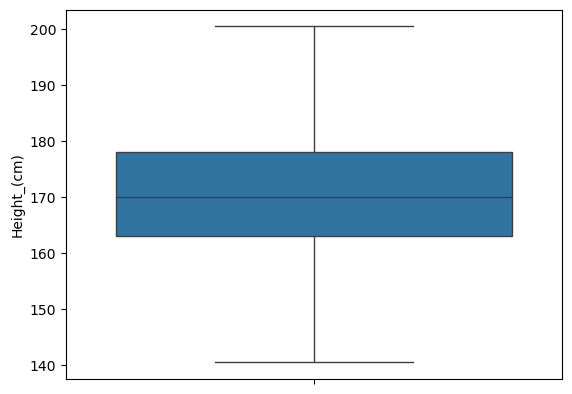

In [114]:
sns.boxplot(h_df['Height_(cm)'])
plt.show()

In [115]:
w_low=q1['Weight_(kg)']-(1.5*iqr['Weight_(kg)'])
w_high=q3['Weight_(kg)']+(1.5*iqr['Weight_(kg)'])

In [116]:
w_df=df.copy()
w_df['Weight_(kg)']=np.where(w_df['Weight_(kg)']>w_high,
                    w_high,
                    np.where(w_df['Weight_(kg)']<w_low,
                    w_low,
                    w_df['Weight_(kg)']
    )
)

In [117]:
df.reset_index()

,index,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,0,3,2,0,0,0,0,0,0,1,0,10,150,32.66,14.54,1,0,30,16,12
1,1,4,4,0,1,0,0,0,2,0,0,10,165,77.11,28.29,0,0,30,0,4
2,2,4,4,1,0,0,0,0,2,0,0,8,163,88.45,33.47,0,4,12,3,16
3,3,3,4,1,1,0,0,0,2,0,1,11,180,93.44,28.73,0,0,30,30,8
4,4,2,4,0,0,0,0,0,0,0,1,12,191,88.45,24.37,1,0,8,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308769,308849,4,4,1,0,0,0,0,0,0,1,1,168,81.65,29.05,0,4,30,8,0
308770,308850,1,3,1,0,0,0,0,2,0,1,9,180,69.85,21.48,0,8,15,60,4
308771,308851,4,0,1,0,0,0,1,1,0,0,2,157,61.23,24.69,1,4,40,8,4
308772,308852,4,4,1,0,0,0,0,0,0,1,9,183,79.38,23.73,0,3,30,12,0


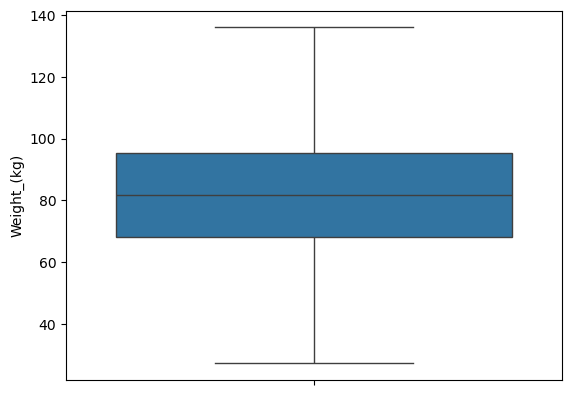

In [118]:
sns.boxplot(w_df['Weight_(kg)'])
plt.show()

In [119]:
b_low=q1['BMI']-(1.5*iqr['BMI'])
b_high=q3['BMI']+(1.5*iqr['BMI'])

In [120]:
b_df=df.copy()
b_df['BMI']=np.where(b_df['BMI']>b_high,
                    b_high,
                    np.where(b_df['BMI']<b_low,
                    b_low,
                    b_df['BMI']
    )
)

In [121]:
df.reset_index()

,index,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,0,3,2,0,0,0,0,0,0,1,0,10,150,32.66,14.54,1,0,30,16,12
1,1,4,4,0,1,0,0,0,2,0,0,10,165,77.11,28.29,0,0,30,0,4
2,2,4,4,1,0,0,0,0,2,0,0,8,163,88.45,33.47,0,4,12,3,16
3,3,3,4,1,1,0,0,0,2,0,1,11,180,93.44,28.73,0,0,30,30,8
4,4,2,4,0,0,0,0,0,0,0,1,12,191,88.45,24.37,1,0,8,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308769,308849,4,4,1,0,0,0,0,0,0,1,1,168,81.65,29.05,0,4,30,8,0
308770,308850,1,3,1,0,0,0,0,2,0,1,9,180,69.85,21.48,0,8,15,60,4
308771,308851,4,0,1,0,0,0,1,1,0,0,2,157,61.23,24.69,1,4,40,8,4
308772,308852,4,4,1,0,0,0,0,0,0,1,9,183,79.38,23.73,0,3,30,12,0


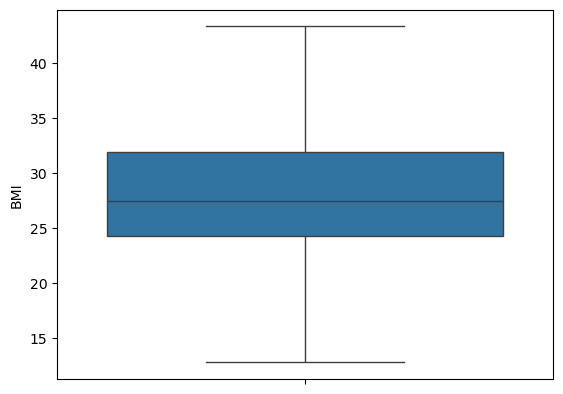

In [122]:
sns.boxplot(b_df['BMI'])
plt.show()

In [123]:
ac_low=q1['Alcohol_Consumption']-(1.5*iqr['Alcohol_Consumption'])
ac_high=q3['Alcohol_Consumption']+(1.5*iqr['Alcohol_Consumption'])

In [124]:
ac_df = df.copy()
ac_df['Alcohol_Consumption']=np.where(ac_df['Alcohol_Consumption']>ac_high,
                    ac_high,
                    np.where(ac_df['Alcohol_Consumption']<ac_low,
                    ac_low,
                    ac_df['Alcohol_Consumption']
    )
)

In [125]:
df.reset_index()

,index,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,0,3,2,0,0,0,0,0,0,1,0,10,150,32.66,14.54,1,0,30,16,12
1,1,4,4,0,1,0,0,0,2,0,0,10,165,77.11,28.29,0,0,30,0,4
2,2,4,4,1,0,0,0,0,2,0,0,8,163,88.45,33.47,0,4,12,3,16
3,3,3,4,1,1,0,0,0,2,0,1,11,180,93.44,28.73,0,0,30,30,8
4,4,2,4,0,0,0,0,0,0,0,1,12,191,88.45,24.37,1,0,8,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308769,308849,4,4,1,0,0,0,0,0,0,1,1,168,81.65,29.05,0,4,30,8,0
308770,308850,1,3,1,0,0,0,0,2,0,1,9,180,69.85,21.48,0,8,15,60,4
308771,308851,4,0,1,0,0,0,1,1,0,0,2,157,61.23,24.69,1,4,40,8,4
308772,308852,4,4,1,0,0,0,0,0,0,1,9,183,79.38,23.73,0,3,30,12,0


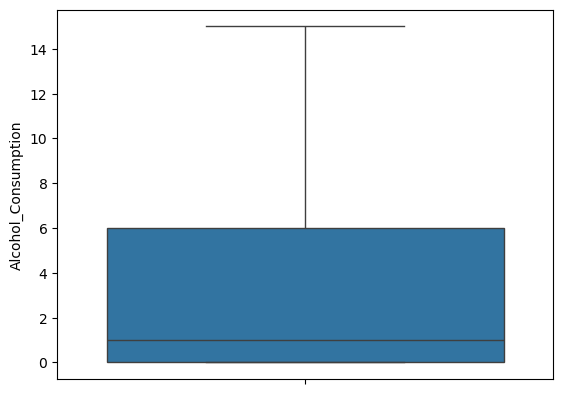

In [126]:
sns.boxplot(ac_df['Alcohol_Consumption'])
plt.show()

In [127]:
fc_low=q1['Fruit_Consumption']-(1.5*iqr['Fruit_Consumption'])
fc_high=q3['Fruit_Consumption']+(1.5*iqr['Fruit_Consumption'])

In [128]:
fc_df = df.copy()
fc_df['Fruit_Consumption']=np.where(fc_df['Fruit_Consumption']>fc_high,
                    fc_high,
                    np.where(fc_df['Fruit_Consumption']<fc_low,
                    fc_low,
                    fc_df['Fruit_Consumption']
    )
)

In [129]:
df.reset_index()

,index,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,0,3,2,0,0,0,0,0,0,1,0,10,150,32.66,14.54,1,0,30,16,12
1,1,4,4,0,1,0,0,0,2,0,0,10,165,77.11,28.29,0,0,30,0,4
2,2,4,4,1,0,0,0,0,2,0,0,8,163,88.45,33.47,0,4,12,3,16
3,3,3,4,1,1,0,0,0,2,0,1,11,180,93.44,28.73,0,0,30,30,8
4,4,2,4,0,0,0,0,0,0,0,1,12,191,88.45,24.37,1,0,8,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308769,308849,4,4,1,0,0,0,0,0,0,1,1,168,81.65,29.05,0,4,30,8,0
308770,308850,1,3,1,0,0,0,0,2,0,1,9,180,69.85,21.48,0,8,15,60,4
308771,308851,4,0,1,0,0,0,1,1,0,0,2,157,61.23,24.69,1,4,40,8,4
308772,308852,4,4,1,0,0,0,0,0,0,1,9,183,79.38,23.73,0,3,30,12,0


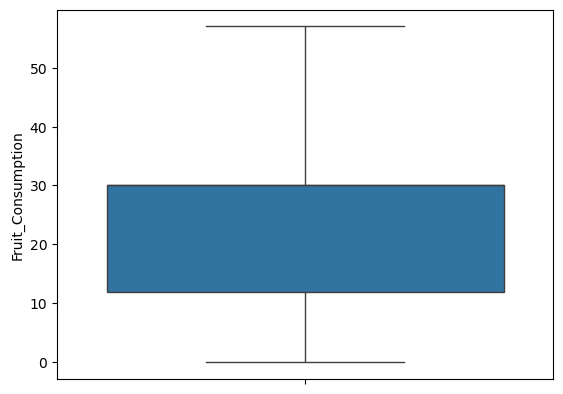

In [130]:
sns.boxplot(fc_df['Fruit_Consumption'])
plt.show()

In [131]:
gvc_low=q1['Green_Vegetables_Consumption']-(1.5*iqr['Green_Vegetables_Consumption'])
gvc_high=q3['Green_Vegetables_Consumption']+(1.5*iqr['Green_Vegetables_Consumption'])

In [132]:
gvc_df = df.copy()
gvc_df['Green_Vegetables_Consumption']=np.where(gvc_df['Green_Vegetables_Consumption']>gvc_high,
                    gvc_high,
                    np.where(gvc_df['Green_Vegetables_Consumption']<gvc_low,
                    gvc_low,
                    gvc_df['Green_Vegetables_Consumption']
    )
)

In [133]:
df.reset_index()

,index,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,0,3,2,0,0,0,0,0,0,1,0,10,150,32.66,14.54,1,0,30,16,12
1,1,4,4,0,1,0,0,0,2,0,0,10,165,77.11,28.29,0,0,30,0,4
2,2,4,4,1,0,0,0,0,2,0,0,8,163,88.45,33.47,0,4,12,3,16
3,3,3,4,1,1,0,0,0,2,0,1,11,180,93.44,28.73,0,0,30,30,8
4,4,2,4,0,0,0,0,0,0,0,1,12,191,88.45,24.37,1,0,8,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308769,308849,4,4,1,0,0,0,0,0,0,1,1,168,81.65,29.05,0,4,30,8,0
308770,308850,1,3,1,0,0,0,0,2,0,1,9,180,69.85,21.48,0,8,15,60,4
308771,308851,4,0,1,0,0,0,1,1,0,0,2,157,61.23,24.69,1,4,40,8,4
308772,308852,4,4,1,0,0,0,0,0,0,1,9,183,79.38,23.73,0,3,30,12,0


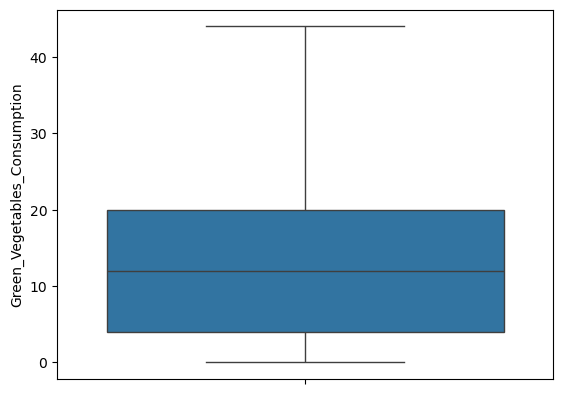

In [134]:
sns.boxplot(gvc_df['Green_Vegetables_Consumption'])
plt.show()

In [135]:
fpc_low=q1['FriedPotato_Consumption']-(1.5*iqr['FriedPotato_Consumption'])
fpc_high=q3['FriedPotato_Consumption']+(1.5*iqr['FriedPotato_Consumption'])

In [136]:
fpc_df = df.copy()
fpc_df['FriedPotato_Consumption']=np.where(fpc_df['FriedPotato_Consumption']>fpc_high,
                    fpc_high,
                    np.where(fpc_df['FriedPotato_Consumption']<fpc_low,
                    fpc_low,
                    fpc_df['FriedPotato_Consumption']
    )
)

In [137]:
df.reset_index()

,index,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,0,3,2,0,0,0,0,0,0,1,0,10,150,32.66,14.54,1,0,30,16,12
1,1,4,4,0,1,0,0,0,2,0,0,10,165,77.11,28.29,0,0,30,0,4
2,2,4,4,1,0,0,0,0,2,0,0,8,163,88.45,33.47,0,4,12,3,16
3,3,3,4,1,1,0,0,0,2,0,1,11,180,93.44,28.73,0,0,30,30,8
4,4,2,4,0,0,0,0,0,0,0,1,12,191,88.45,24.37,1,0,8,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308769,308849,4,4,1,0,0,0,0,0,0,1,1,168,81.65,29.05,0,4,30,8,0
308770,308850,1,3,1,0,0,0,0,2,0,1,9,180,69.85,21.48,0,8,15,60,4
308771,308851,4,0,1,0,0,0,1,1,0,0,2,157,61.23,24.69,1,4,40,8,4
308772,308852,4,4,1,0,0,0,0,0,0,1,9,183,79.38,23.73,0,3,30,12,0


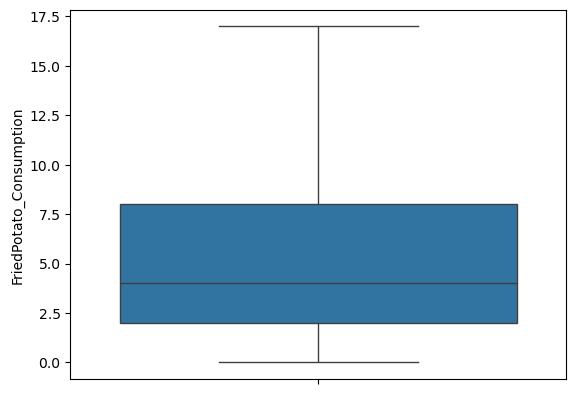

In [138]:
sns.boxplot(fpc_df['FriedPotato_Consumption'])
plt.show()

### Dispersion of Data- min, max, range, variance, standard deviation, coefficient of variation

In [140]:
disp = pd.DataFrame({
    "Min": df[num_cols].min(),
    "Max": df[num_cols].max(),
    "Range": df[num_cols].max() - df[num_cols].min(),
    "Variance": df[num_cols].var(),
    "Standard Deviation": df[num_cols].std(),
    "Coefficient of Variation": df[num_cols].std() / df[num_cols].mean()
})
disp

,Min,Max,Range,Variance,Standard Deviation,Coefficient of Variation
Height_(cm),91.00,241.00,150.00,113.602596,10.658452,0.062471
Weight_(kg),24.95,293.02,268.07,455.594694,21.344664,0.255348
BMI,12.02,99.33,87.31,42.547056,6.522810,0.227857
Alcohol_Consumption,0.00,30.00,30.00,67.247124,8.200434,1.608699
Fruit_Consumption,0.00,120.00,120.00,618.905552,24.877812,0.833866
Green_Vegetables_Consumption,0.00,128.00,128.00,222.812696,14.926912,0.987915
FriedPotato_Consumption,0.00,128.00,128.00,73.682255,8.583837,1.363112


### Skewness and Kurtosis

In [142]:
skew_kurt = pd.DataFrame({
    "Skewness": df[num_cols].skew(),
    "Kurtosis": df[num_cols].kurt()
})
skew_kurt

,Skewness,Kurtosis
Height_(cm),0.015299,0.005863
Weight_(kg),1.058099,2.573165
BMI,1.376452,4.240144
Alcohol_Consumption,1.885261,2.538744
Fruit_Consumption,1.248447,1.253445
Green_Vegetables_Consumption,2.415920,9.445275
FriedPotato_Consumption,4.911907,42.222583


### Bell-Shaped Curve

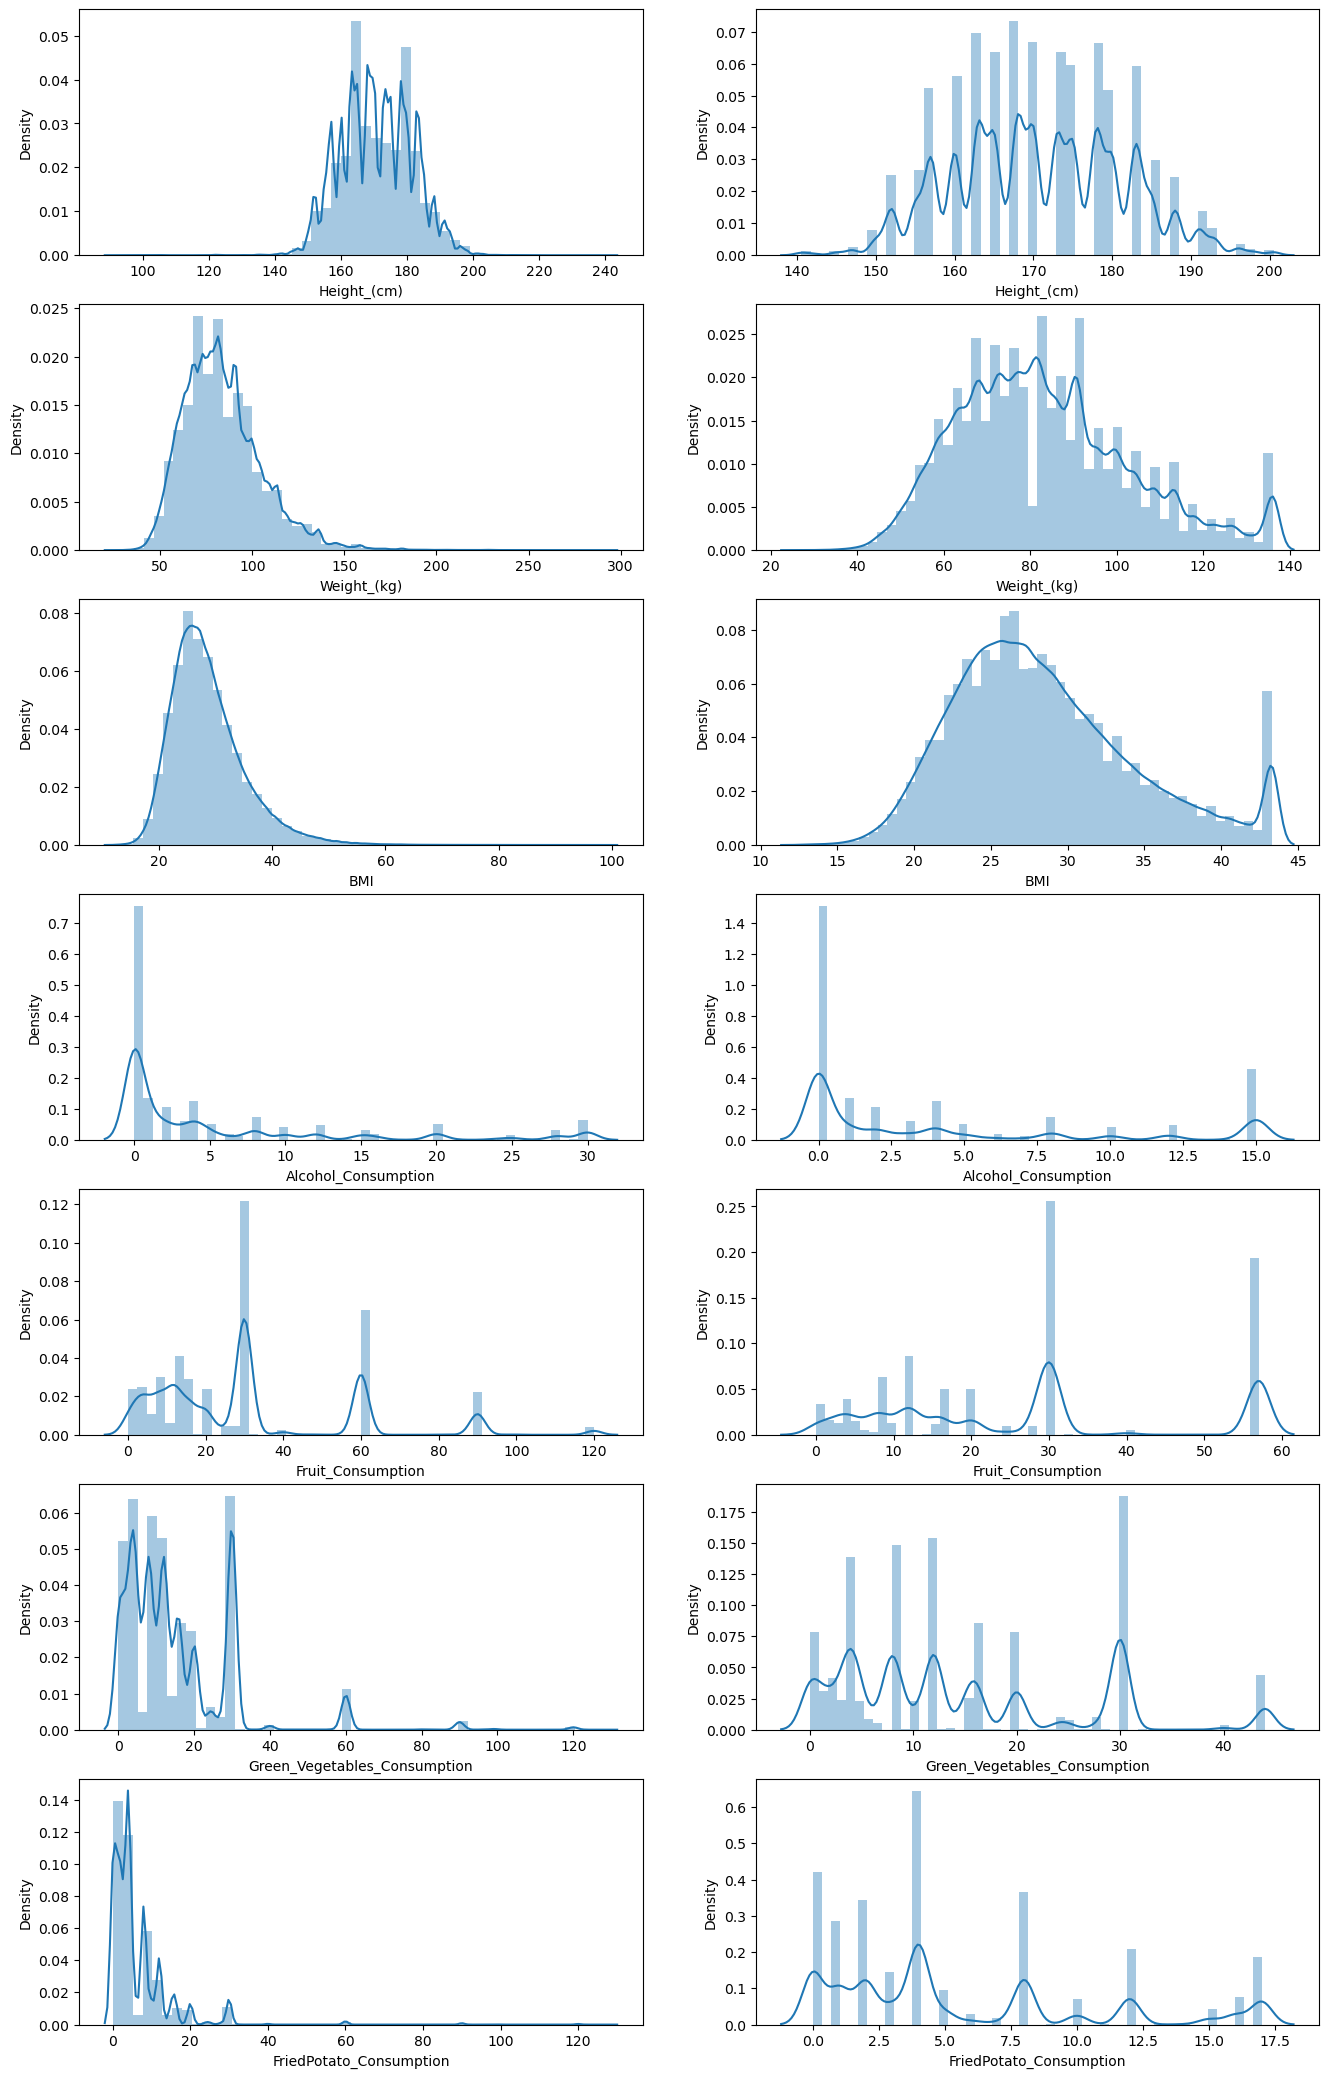

In [144]:
plt.figure(figsize=(16,30))

plt.subplot(8,2,1)
sns.distplot(df['Height_(cm)'])

plt.subplot(8,2,2)
sns.distplot(h_df['Height_(cm)'])

plt.subplot(8,2,3)
sns.distplot(df['Weight_(kg)'])

plt.subplot(8,2,4)
sns.distplot(w_df['Weight_(kg)'])

plt.subplot(8,2,5)
sns.distplot(df['BMI'])

plt.subplot(8,2,6)
sns.distplot(b_df['BMI'])

plt.subplot(8,2,7)
sns.distplot(df['Alcohol_Consumption'])

plt.subplot(8,2,8)
sns.distplot(ac_df['Alcohol_Consumption'])

plt.subplot(8,2,9)
sns.distplot(df['Fruit_Consumption'])

plt.subplot(8,2,10)
sns.distplot(fc_df['Fruit_Consumption'])

plt.subplot(8,2,11)
sns.distplot(df['Green_Vegetables_Consumption'])

plt.subplot(8,2,12)
sns.distplot(gvc_df['Green_Vegetables_Consumption'])

plt.subplot(8,2,13)
sns.distplot(df['FriedPotato_Consumption'])

plt.subplot(8,2,14)
sns.distplot(fpc_df['FriedPotato_Consumption'])

plt.show()

### Boxplot after treatment of outliers

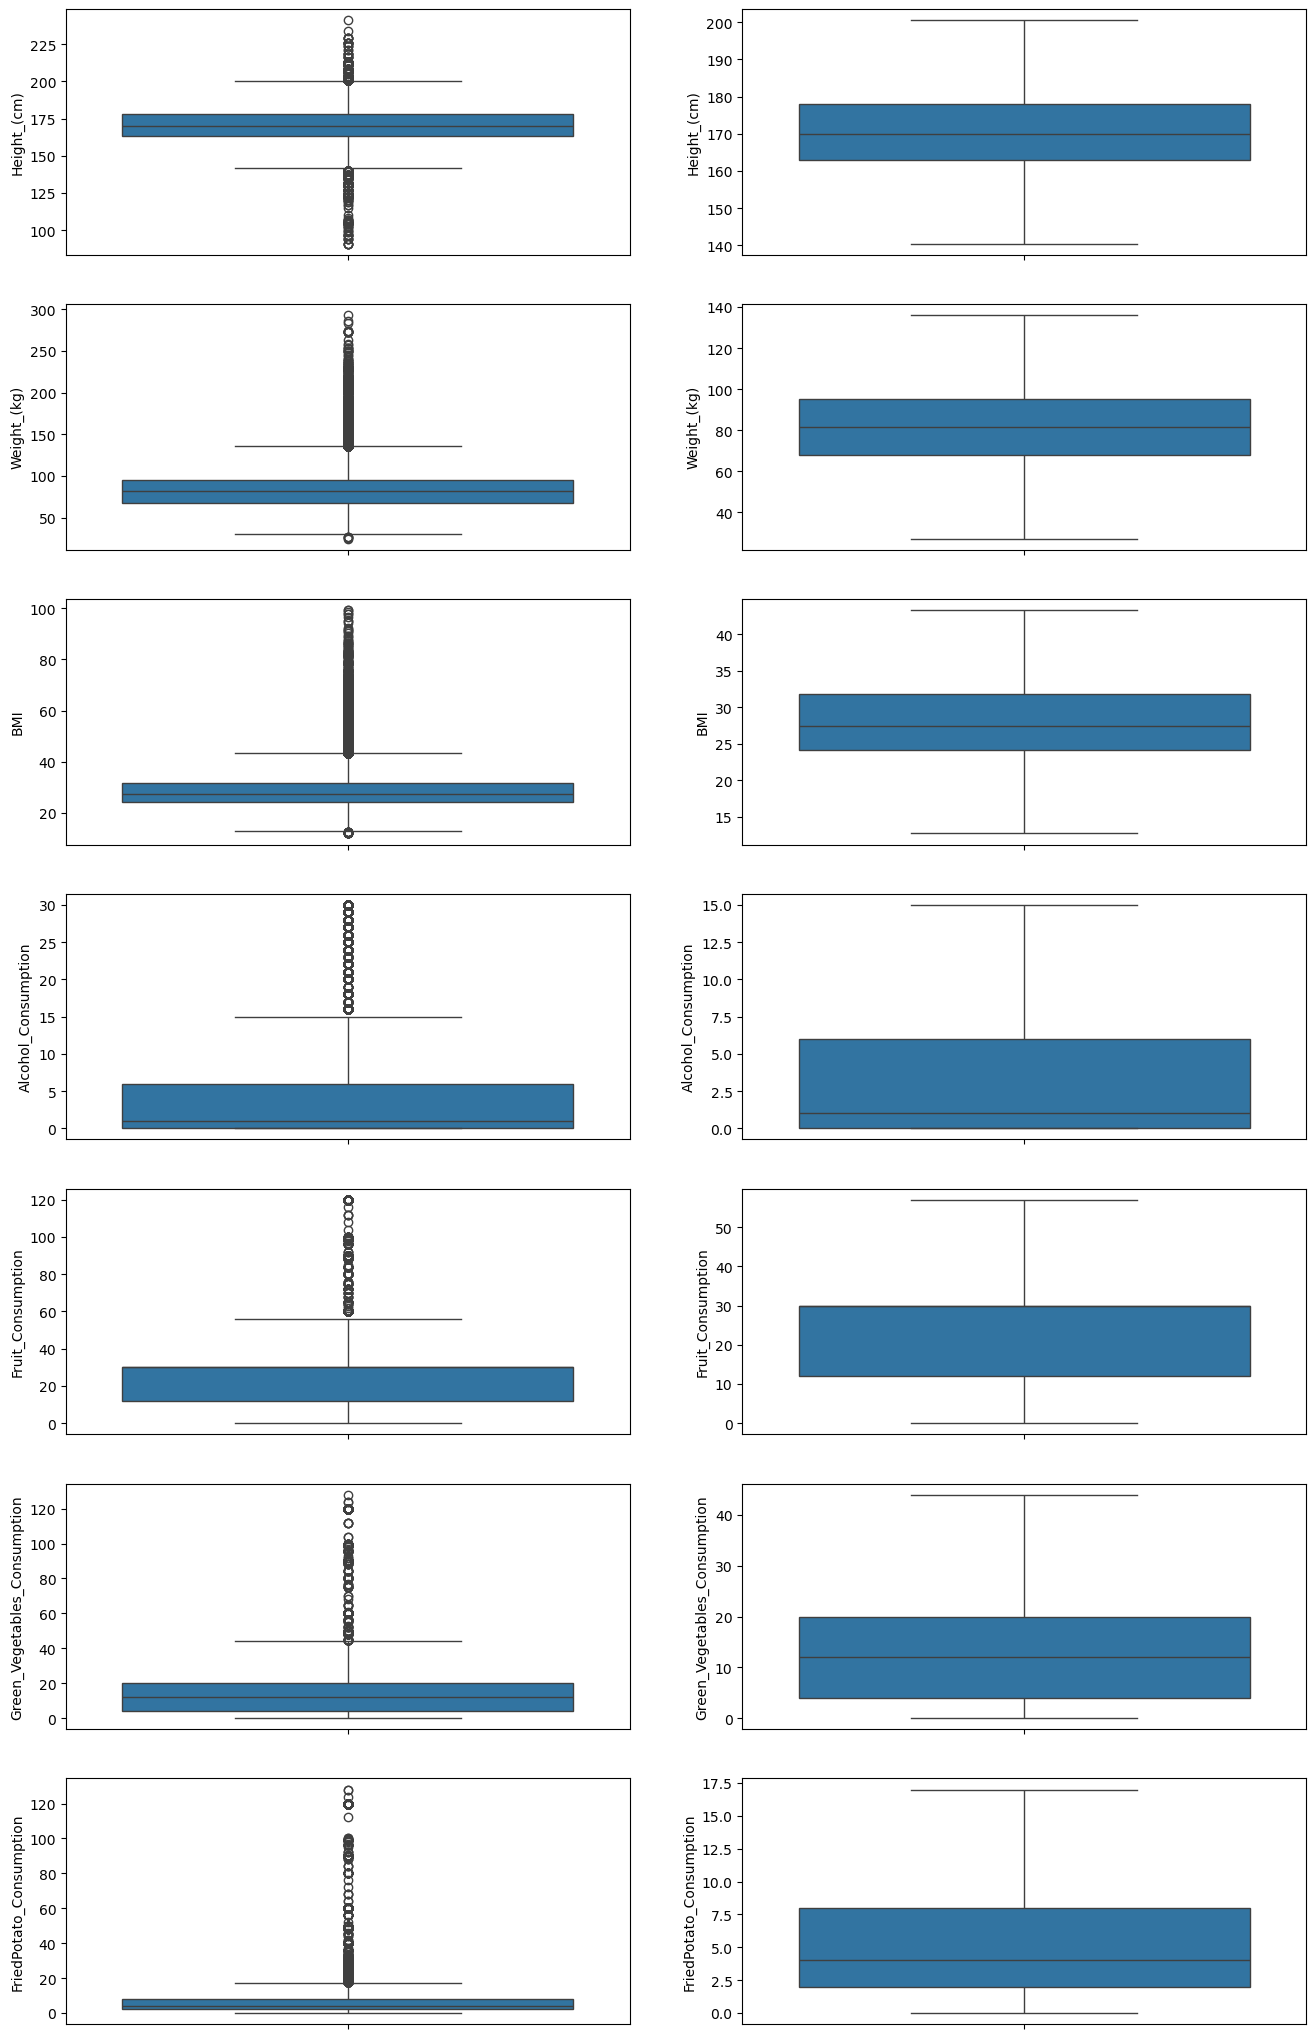

In [146]:
plt.figure(figsize=(16,30))

plt.subplot(8,2,1)
sns.boxplot(df['Height_(cm)'])

plt.subplot(8,2,2)
sns.boxplot(h_df['Height_(cm)'])

plt.subplot(8,2,3)
sns.boxplot(df['Weight_(kg)'])

plt.subplot(8,2,4)
sns.boxplot(w_df['Weight_(kg)'])

plt.subplot(8,2,5)
sns.boxplot(df['BMI'])

plt.subplot(8,2,6)
sns.boxplot(b_df['BMI'])

plt.subplot(8,2,7)
sns.boxplot(df['Alcohol_Consumption'])

plt.subplot(8,2,8)
sns.boxplot(ac_df['Alcohol_Consumption'])

plt.subplot(8,2,9)
sns.boxplot(df['Fruit_Consumption'])

plt.subplot(8,2,10)
sns.boxplot(fc_df['Fruit_Consumption'])

plt.subplot(8,2,11)
sns.boxplot(df['Green_Vegetables_Consumption'])

plt.subplot(8,2,12)
sns.boxplot(gvc_df['Green_Vegetables_Consumption'])

plt.subplot(8,2,13)
sns.boxplot(df['FriedPotato_Consumption'])

plt.subplot(8,2,14)
sns.boxplot(fpc_df['FriedPotato_Consumption'])

plt.show()

### Standard Scaler

In [148]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [149]:
x=df.drop('Heart_Disease',axis=1)

In [150]:
y=df['Heart_Disease']

In [151]:
x_scaled=scaler.fit_transform(x)

In [152]:
x_scaled = pd.DataFrame(scaler.transform(x), columns=x.columns)
x_scaled

,General_Health,Checkup,Exercise,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,0.486453,-1.485784,-1.85601,-0.327997,-0.3273,-0.500730,-0.426171,1.433619,-0.963312,0.983087,-1.934170,-2.386099,-2.159627,1.210415,-0.621621,0.006661,0.059656,0.664362
1,1.155791,0.475679,-1.85601,-0.327997,-0.3273,-0.500730,2.501901,-0.697536,-0.963312,0.983087,-0.526833,-0.303608,-0.051636,-0.826163,-0.621621,0.006661,-1.012235,-0.267624
2,1.155791,0.475679,0.53879,-0.327997,-0.3273,-0.500730,2.501901,-0.697536,-0.963312,0.415468,-0.714478,0.227673,0.742501,-0.826163,-0.133842,-0.716876,-0.811255,1.130355
3,0.486453,0.475679,0.53879,-0.327997,-0.3273,-0.500730,2.501901,-0.697536,1.038085,1.266897,0.880503,0.461456,0.015819,-0.826163,-0.621621,0.006661,0.997561,0.198369
4,-0.182885,0.475679,-1.85601,-0.327997,-0.3273,-0.500730,-0.426171,-0.697536,1.038085,1.550706,1.912549,0.227673,-0.652605,1.210415,-0.621621,-0.877663,-0.744262,-0.733617
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308769,1.155791,0.475679,0.53879,-0.327997,-0.3273,-0.500730,-0.426171,-0.697536,1.038085,-1.571200,-0.245366,-0.090908,0.064878,-0.826163,-0.133842,0.006661,-0.476289,-0.733617
308770,-0.852223,-0.505053,0.53879,-0.327997,-0.3273,-0.500730,2.501901,-0.697536,1.038085,0.699277,0.880503,-0.643740,-1.095666,-0.826163,0.353938,-0.596287,3.007357,-0.267624
308771,1.155791,-3.447247,0.53879,-0.327997,-0.3273,1.997086,1.037865,-0.697536,-0.963312,-1.287390,-1.277413,-1.047589,-0.603547,1.210415,-0.133842,0.408626,-0.476289,-0.267624
308772,1.155791,0.475679,0.53879,-0.327997,-0.3273,-0.500730,-0.426171,-0.697536,1.038085,0.699277,1.161970,-0.197258,-0.750723,-0.826163,-0.255786,0.006661,-0.208317,-0.733617


### Correlation, Heatmap, VIF

In [154]:
# Correlation
x_scaled.corr()

,General_Health,Checkup,Exercise,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
General_Health,1.000000,0.027431,0.036864,0.020864,0.004456,0.002313,-0.027952,0.014013,-0.013733,0.032378,0.001634,0.014861,0.013967,0.004324,0.023673,-0.010957,-0.021517,-0.000682
Checkup,0.027431,1.000000,-0.029803,0.079313,0.086779,0.035674,0.136266,0.150225,-0.100058,0.223116,-0.088951,0.012043,0.060903,-0.010064,-0.046631,0.039297,0.034925,-0.055706
Exercise,0.036864,-0.029803,1.000000,-0.003963,-0.054363,-0.084673,-0.145081,-0.124785,0.059355,-0.122334,0.091622,-0.090121,-0.155732,-0.093241,0.095028,0.136782,0.124983,-0.036904
Skin_Cancer,0.020864,0.079313,-0.003963,1.000000,0.150781,-0.013041,0.038051,0.136146,0.009658,0.272075,0.006799,-0.028986,-0.037647,0.032793,0.042734,0.024143,0.012894,-0.038945
Other_Cancer,0.004456,0.086779,-0.054363,0.150781,1.000000,0.015861,0.070537,0.129320,-0.042061,0.234464,-0.043476,-0.021169,0.001015,0.053390,-0.008704,0.007992,-0.003215,-0.033326
Depression,0.002313,0.035674,-0.084673,-0.013041,0.015861,1.000000,0.050614,0.121562,-0.141457,-0.103195,-0.091315,0.047904,0.109557,0.100215,-0.028200,-0.039938,-0.051134,0.018108
Diabetes,-0.027952,0.136266,-0.145081,0.038051,0.070537,0.050614,1.000000,0.145026,0.010126,0.214521,-0.027281,0.173624,0.213775,0.058375,-0.117509,-0.022537,-0.031095,-0.004758
Arthritis,0.014013,0.150225,-0.124785,0.136146,0.129320,0.121562,0.145026,1.000000,-0.100047,0.370996,-0.097794,0.074068,0.137924,0.123128,-0.024968,-0.001983,-0.018803,-0.050994
Sex,-0.013733,-0.100058,0.059355,0.009658,-0.042061,-0.141457,0.010126,-0.100047,1.000000,-0.060234,0.698129,0.353989,0.010978,0.073407,0.129311,-0.092486,-0.069169,0.130049
Age_Category,0.032378,0.223116,-0.122334,0.272075,0.234464,-0.103195,0.214521,0.370996,-0.060234,1.000000,-0.120922,-0.062308,-0.007426,0.133155,0.012833,0.043661,0.036030,-0.142761


In [155]:
# VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(x_scaled,i)for i in range(x_scaled.shape[1])]
vif['Features']=x.columns
print(vif)

          VIF                      Features
0    1.007326                General_Health
1    1.084136                       Checkup
2    1.106219                      Exercise
3    1.098246                   Skin_Cancer
4    1.073694                  Other_Cancer
5    1.095896                    Depression
6    1.136641                      Diabetes
7    1.239771                     Arthritis
8    2.043097                           Sex
9    1.461338                  Age_Category
10  18.718091                   Height_(cm)
11  67.031090                   Weight_(kg)
12  52.244794                           BMI
13   1.073531               Smoking_History
14   1.066016           Alcohol_Consumption
15   1.114541             Fruit_Consumption
16   1.103119  Green_Vegetables_Consumption
17   1.046994       FriedPotato_Consumption


In [156]:
x=df.drop('Heart_Disease',axis=1)
x=x.drop('Weight_(kg)',axis=1)

In [157]:
y=df['Heart_Disease']

In [158]:
x_scaler=scaler.fit_transform(x)

In [159]:
x_scaler = pd.DataFrame(scaler.transform(x), columns=x.columns)
x_scaler

,General_Health,Checkup,Exercise,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,0.486453,-1.485784,-1.85601,-0.327997,-0.3273,-0.500730,-0.426171,1.433619,-0.963312,0.983087,-1.934170,-2.159627,1.210415,-0.621621,0.006661,0.059656,0.664362
1,1.155791,0.475679,-1.85601,-0.327997,-0.3273,-0.500730,2.501901,-0.697536,-0.963312,0.983087,-0.526833,-0.051636,-0.826163,-0.621621,0.006661,-1.012235,-0.267624
2,1.155791,0.475679,0.53879,-0.327997,-0.3273,-0.500730,2.501901,-0.697536,-0.963312,0.415468,-0.714478,0.742501,-0.826163,-0.133842,-0.716876,-0.811255,1.130355
3,0.486453,0.475679,0.53879,-0.327997,-0.3273,-0.500730,2.501901,-0.697536,1.038085,1.266897,0.880503,0.015819,-0.826163,-0.621621,0.006661,0.997561,0.198369
4,-0.182885,0.475679,-1.85601,-0.327997,-0.3273,-0.500730,-0.426171,-0.697536,1.038085,1.550706,1.912549,-0.652605,1.210415,-0.621621,-0.877663,-0.744262,-0.733617
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308769,1.155791,0.475679,0.53879,-0.327997,-0.3273,-0.500730,-0.426171,-0.697536,1.038085,-1.571200,-0.245366,0.064878,-0.826163,-0.133842,0.006661,-0.476289,-0.733617
308770,-0.852223,-0.505053,0.53879,-0.327997,-0.3273,-0.500730,2.501901,-0.697536,1.038085,0.699277,0.880503,-1.095666,-0.826163,0.353938,-0.596287,3.007357,-0.267624
308771,1.155791,-3.447247,0.53879,-0.327997,-0.3273,1.997086,1.037865,-0.697536,-0.963312,-1.287390,-1.277413,-0.603547,1.210415,-0.133842,0.408626,-0.476289,-0.267624
308772,1.155791,0.475679,0.53879,-0.327997,-0.3273,-0.500730,-0.426171,-0.697536,1.038085,0.699277,1.161970,-0.750723,-0.826163,-0.255786,0.006661,-0.208317,-0.733617


In [160]:
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(x_scaler,i)for i in range(x_scaler.shape[1])]
vif['Features']=x.columns
print(vif)

         VIF                      Features
0   1.007157                General_Health
1   1.083828                       Checkup
2   1.106154                      Exercise
3   1.098225                   Skin_Cancer
4   1.073531                  Other_Cancer
5   1.095470                    Depression
6   1.136625                      Diabetes
7   1.239712                     Arthritis
8   2.041882                           Sex
9   1.460196                  Age_Category
10  1.994166                   Height_(cm)
11  1.111486                           BMI
12  1.073531               Smoking_History
13  1.065861           Alcohol_Consumption
14  1.114332             Fruit_Consumption
15  1.103088  Green_Vegetables_Consumption
16  1.046927       FriedPotato_Consumption


In [161]:
x_scaler.corr()

,General_Health,Checkup,Exercise,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
General_Health,1.000000,0.027431,0.036864,0.020864,0.004456,0.002313,-0.027952,0.014013,-0.013733,0.032378,0.001634,0.013967,0.004324,0.023673,-0.010957,-0.021517,-0.000682
Checkup,0.027431,1.000000,-0.029803,0.079313,0.086779,0.035674,0.136266,0.150225,-0.100058,0.223116,-0.088951,0.060903,-0.010064,-0.046631,0.039297,0.034925,-0.055706
Exercise,0.036864,-0.029803,1.000000,-0.003963,-0.054363,-0.084673,-0.145081,-0.124785,0.059355,-0.122334,0.091622,-0.155732,-0.093241,0.095028,0.136782,0.124983,-0.036904
Skin_Cancer,0.020864,0.079313,-0.003963,1.000000,0.150781,-0.013041,0.038051,0.136146,0.009658,0.272075,0.006799,-0.037647,0.032793,0.042734,0.024143,0.012894,-0.038945
Other_Cancer,0.004456,0.086779,-0.054363,0.150781,1.000000,0.015861,0.070537,0.129320,-0.042061,0.234464,-0.043476,0.001015,0.053390,-0.008704,0.007992,-0.003215,-0.033326
Depression,0.002313,0.035674,-0.084673,-0.013041,0.015861,1.000000,0.050614,0.121562,-0.141457,-0.103195,-0.091315,0.109557,0.100215,-0.028200,-0.039938,-0.051134,0.018108
Diabetes,-0.027952,0.136266,-0.145081,0.038051,0.070537,0.050614,1.000000,0.145026,0.010126,0.214521,-0.027281,0.213775,0.058375,-0.117509,-0.022537,-0.031095,-0.004758
Arthritis,0.014013,0.150225,-0.124785,0.136146,0.129320,0.121562,0.145026,1.000000,-0.100047,0.370996,-0.097794,0.137924,0.123128,-0.024968,-0.001983,-0.018803,-0.050994
Sex,-0.013733,-0.100058,0.059355,0.009658,-0.042061,-0.141457,0.010126,-0.100047,1.000000,-0.060234,0.698129,0.010978,0.073407,0.129311,-0.092486,-0.069169,0.130049
Age_Category,0.032378,0.223116,-0.122334,0.272075,0.234464,-0.103195,0.214521,0.370996,-0.060234,1.000000,-0.120922,-0.007426,0.133155,0.012833,0.043661,0.036030,-0.142761


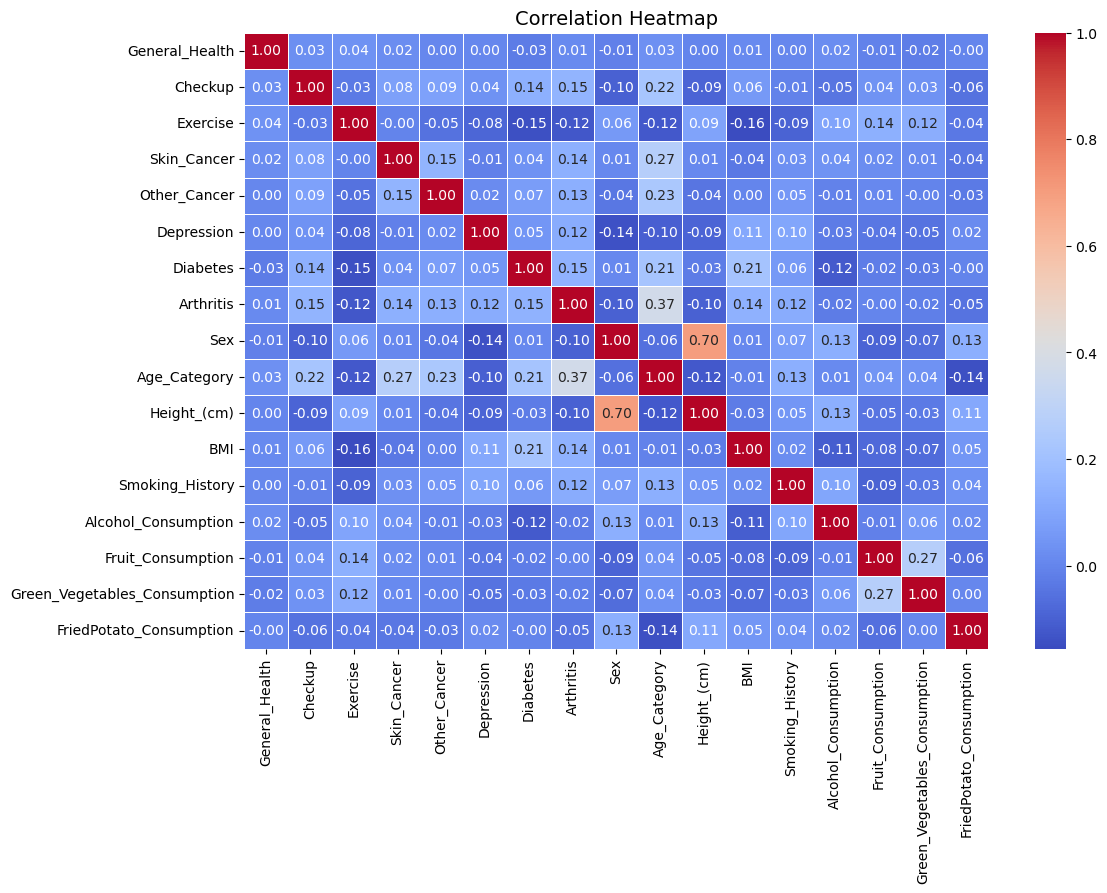

In [162]:
# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(x_scaler.corr(), annot=True, cmap="coolwarm", fmt=".2f",linewidths=0.5)
plt.title("Correlation Heatmap", fontsize=14)
plt.show()

### Train-Test-Split

In [164]:
from sklearn.model_selection import train_test_split

In [165]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [166]:
x_train.head(3)

,General_Health,Checkup,Exercise,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
241448,2,4,1,0,0,0,0,0,0,7,160,33.66,1,0,30,4,2
44734,2,3,1,1,1,0,0,0,0,8,168,21.95,0,0,60,12,4
293228,2,4,1,0,0,0,0,0,1,11,178,22.53,0,0,30,8,1


In [167]:
x_test.head(3)

,General_Health,Checkup,Exercise,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
112130,0,3,1,0,0,0,0,0,0,7,163,23.00,1,0,20,4,16
95666,4,4,1,0,0,0,1,1,0,10,155,30.61,1,0,30,40,0
206006,0,4,1,0,0,0,0,0,0,6,170,20.36,0,0,30,30,0


In [168]:
y_train.head(3)

241448    0
44734     0
293228    1
Name: Heart_Disease, dtype: int32

In [169]:
y_test.head(3)

112130    0
95666     1
206006    0
Name: Heart_Disease, dtype: int32

In [170]:
#checking shape of x_train:-
x_train.shape

(247019, 17)

In [171]:
#checking shape of x_test:-
x_test.shape

(61755, 17)

In [172]:
#checking shape of y_train:-
y_train.shape

(247019,)

In [173]:
#checking shape of y_test:-
y_test.shape

(61755,)

### Sampling

In [175]:
from imblearn.over_sampling import SMOTE

In [176]:
smote = SMOTE(random_state=42)
x_train_res, y_train_res = smote.fit_resample(x_train, y_train)

### Logistic Regression

In [178]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [179]:
lR=LogisticRegression()
lR.fit(x_train_res,y_train_res)

LogisticRegression()

In [180]:
test_y_pred = lR.predict(x_test)

In [181]:
train_y_pred = lR.predict(x_train)

In [182]:
print("Accuracy:",accuracy_score(y_test, test_y_pred))

Accuracy: 0.71937494939681


In [183]:
print("Accuracy:",accuracy_score(y_train, train_y_pred))

Accuracy: 0.7164388164473178


In [184]:
print("Confusion Matrix:",confusion_matrix(y_test, test_y_pred))

Confusion Matrix: [[41413 15264]
 [ 2066  3012]]


In [185]:
print("Confusion Matrix:",confusion_matrix(y_train, train_y_pred))

Confusion Matrix: [[165120  62006]
 [  8039  11854]]


In [186]:
print("Classification Report:",classification_report(y_test, test_y_pred))

Classification Report:               precision    recall  f1-score   support

           0       0.95      0.73      0.83     56677
           1       0.16      0.59      0.26      5078

    accuracy                           0.72     61755
   macro avg       0.56      0.66      0.54     61755
weighted avg       0.89      0.72      0.78     61755



In [187]:
print("Classification Report:",classification_report(y_train, train_y_pred))

Classification Report:               precision    recall  f1-score   support

           0       0.95      0.73      0.83    227126
           1       0.16      0.60      0.25     19893

    accuracy                           0.72    247019
   macro avg       0.56      0.66      0.54    247019
weighted avg       0.89      0.72      0.78    247019



#### Logistic Regression- Performance Evaluation
***Accuracy Score:***

*Test Accuracy: 72.01%*

*Train Accuracy: 71.71%*

***Confusion Matrix (Test Set):***

*True Negative (TN):  41457* 

*False Positive (FP):  15220*

*False Negative (FN):  2068*

*True Positive (TP):  3010*

***Confusion Matrix (Train Set):***

*True Negative (TN):  165259*

*False Positive (FP):  61867*

*False Negative (FN):  8015*

*True Positive (TP):  11878*

***Classification Report (Test Set):***

**- 0 (No Disease):**

*Precision: 0.95*

*Recall: 0.73*

*F1-score: 0.83*

*Support: 56677*

**- 1 (Disease):**

*Precision: 0.17*

*Recall: 0.59*

*F1-score: 0.26*

*Support: 5078*

*- Accuracy: 0.72*

*- Macro Avg F1-score: 0.54*

*- Weighted Avg F1-score: 0.78*

***Classification Report (Train Set):***

**- 0 (No Disease):**

*Precision: 0.95*

*Recall: 0.73*

*F1-score: 0.83*

*Support: 227126*

**- 1 (Disease):**

*Precision: 0.16*

*Recall: 0.60*

*F1-score: 0.25*

*Support: 19893*

*- Accuracy: 0.72*

*- Macro Avg F1-score: 0.54*

*- Weighted Avg F1-score: 0.78*

### KNN

In [190]:
from sklearn.neighbors import KNeighborsClassifier

In [191]:
knn = KNeighborsClassifier()  
knn.fit(x_train_res, y_train_res)

KNeighborsClassifier()

In [192]:
test_y_pred = knn.predict(x_test)

In [193]:
train_y_pred = knn.predict(x_train)

In [194]:
print("Accuracy:",accuracy_score(y_test, test_y_pred))

Accuracy: 0.7135292688851105


In [195]:
print("Accuracy:",accuracy_score(y_train, train_y_pred))

Accuracy: 0.8224711459442391


In [196]:
print("Confusion Matrix:",confusion_matrix(y_test, test_y_pred))

Confusion Matrix: [[41639 15038]
 [ 2653  2425]]


In [197]:
print("Confusion Matrix:",confusion_matrix(y_train, train_y_pred))

Confusion Matrix: [[183298  43828]
 [    25  19868]]


In [198]:
print("Classification Report:",classification_report(y_test, test_y_pred))

Classification Report:               precision    recall  f1-score   support

           0       0.94      0.73      0.82     56677
           1       0.14      0.48      0.22      5078

    accuracy                           0.71     61755
   macro avg       0.54      0.61      0.52     61755
weighted avg       0.87      0.71      0.77     61755



In [199]:
print("Classification Report:",classification_report(y_train, train_y_pred))

Classification Report:               precision    recall  f1-score   support

           0       1.00      0.81      0.89    227126
           1       0.31      1.00      0.48     19893

    accuracy                           0.82    247019
   macro avg       0.66      0.90      0.68    247019
weighted avg       0.94      0.82      0.86    247019



#### KNN- Performance Evaluation
***Accuracy Score:***

*Test Accuracy: 71.3%*

*Train Accuracy: 82.1%*

***Confusion Matrix (Test Set):***

*True Negative (TN):  41605* 

*False Positive (FP):  15072*

*False Negative (FN):  2650*

*True Positive (TP):  2428*

***Confusion Matrix (Train Set):***

*True Negative (TN):  183181*

*False Positive (FP):  43945*

*False Negative (FN):  25*

*True Positive (TP):  19868*

***Classification Report (Test Set):***

**- 0 (No Disease):**

*Precision: 0.94*

*Recall: 0.73*

*F1-score: 0.82*

*Support: 56677*

**- 1 (Disease):**

*Precision: 0.14*

*Recall: 0.48*

*F1-score: 0.22*

*Support: 5078*

*- Accuracy: 0.71*

*- Macro Avg F1-score: 0.52*

*- Weighted Avg F1-score: 0.77*

***Classification Report (Train Set):***

**- 0 (No Disease):**

*Precision: 1.00*

*Recall: 0.81*

*F1-score: 0.89*

*Support: 227126*

**- 1 (Disease):**

*Precision: 0.31*

*Recall: 1.00*

*F1-score: 0.47*

*Support: 19893*

*- Accuracy: 0.82*

*- Macro Avg F1-score: 0.68*

*- Weighted Avg F1-score: 0.86*

### Decision Tree

In [202]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [203]:
dt = DecisionTreeClassifier()
dt.fit(x_train_res, y_train_res)

DecisionTreeClassifier()

In [204]:
test_y_pred = dt.predict(x_test)

In [205]:
train_y_pred = dt.predict(x_train)

In [206]:
print("Accuracy:",accuracy_score(y_test, test_y_pred))

Accuracy: 0.7954497611529431


In [207]:
print("Accuracy:",accuracy_score(y_train, train_y_pred))

Accuracy: 0.9999838069136382


In [208]:
print("Confusion Matrix:",confusion_matrix(y_test, test_y_pred))

Confusion Matrix: [[47208  9469]
 [ 3163  1915]]


In [209]:
print("Confusion Matrix:",confusion_matrix(y_train, train_y_pred))

Confusion Matrix: [[227124      2]
 [     2  19891]]


In [210]:
print("Classification Report:",classification_report(y_test, test_y_pred))

Classification Report:               precision    recall  f1-score   support

           0       0.94      0.83      0.88     56677
           1       0.17      0.38      0.23      5078

    accuracy                           0.80     61755
   macro avg       0.55      0.61      0.56     61755
weighted avg       0.87      0.80      0.83     61755



In [211]:
print("Classification Report:",classification_report(y_train, train_y_pred))

Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227126
           1       1.00      1.00      1.00     19893

    accuracy                           1.00    247019
   macro avg       1.00      1.00      1.00    247019
weighted avg       1.00      1.00      1.00    247019



#### Decision Tree- Performance Evaluation
***Accuracy Score:***

*Test Accuracy: 79.42%*

*Train Accuracy: 99.99%*

***Confusion Matrix (Test Set):***

*True Negative (TN):  47175* 

*False Positive (FP):  9523*

*False Negative (FN):  3185*

*True Positive (TP):  1893*

***Confusion Matrix (Train Set):***

*True Negative (TN):  227124*

*False Positive (FP):  2*

*False Negative (FN):  2*

*True Positive (TP):  19891*

***Classification Report (Test Set):***

**- 0 (No Disease):**

*Precision: 0.94*

*Recall: 0.83*

*F1-score: 0.88*

*Support: 56677*


**- 1 (Disease):**

*Precision: 0.17*

*Recall: 0.37*

*F1-score: 0.23*

*Support: 5078*

*- Accuracy: 0.79*

*- Macro Avg F1-score: 0.56*

*- Weighted Avg F1-score: 0.83*

***Classification Report (Train Set):***

**- 0 (No Disease):**

*Precision: 1.00*

*Recall: 1.00*

*F1-score: 1.00*

*Support: 227126*

**- 1 (Disease):**

*Precision: 1.00*

*Recall:  1.00*

*F1-score:  1.00*

*Support: 19893*

*- Accuracy: 1.00*

*- Macro Avg F1-score: 1.00*

*- Weighted Avg F1-score: 1.00*

### Random Forest

In [214]:
from sklearn.ensemble import RandomForestClassifier

In [215]:
rf= RandomForestClassifier()
rf.fit(x_train_res, y_train_res)

RandomForestClassifier()

In [216]:
test_y_pred = rf.predict(x_test)

In [217]:
train_y_pred = rf.predict(x_train)

In [218]:
print("Accuracy:",accuracy_score(y_test, test_y_pred))

Accuracy: 0.849971662213586


In [219]:
print("Accuracy:",accuracy_score(y_train, train_y_pred))

Accuracy: 0.9999797586420478


In [220]:
print("Confusion Matrix:",confusion_matrix(y_test, test_y_pred))

Confusion Matrix: [[50910  5767]
 [ 3498  1580]]


In [221]:
print("Confusion Matrix:",confusion_matrix(y_train, train_y_pred))

Confusion Matrix: [[227122      4]
 [     1  19892]]


In [222]:
print("Classification Report:",classification_report(y_test, test_y_pred))

Classification Report:               precision    recall  f1-score   support

           0       0.94      0.90      0.92     56677
           1       0.22      0.31      0.25      5078

    accuracy                           0.85     61755
   macro avg       0.58      0.60      0.59     61755
weighted avg       0.88      0.85      0.86     61755



In [223]:
print("Classification Report:",classification_report(y_train, train_y_pred))

Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227126
           1       1.00      1.00      1.00     19893

    accuracy                           1.00    247019
   macro avg       1.00      1.00      1.00    247019
weighted avg       1.00      1.00      1.00    247019



#### Random Forest- Performance Evaluation
***Accuracy Score:***

*Test Accuracy: 84.93%*

*Train Accuracy: 99.99%*

***Confusion Matrix (Test Set):***

*True Negative (TN):  50870* 

*False Positive (FP):  5739*

*False Negative (FN):  3494*

*True Positive (TP):  1584*

***Confusion Matrix (Train Set):***

*True Negative (TN):  227122*

*False Positive (FP):  4*

*False Negative (FN):  5*

*True Positive (TP):  19888*

***Classification Report (Test Set):***

**- 0 (No Disease):**

*Precision: 0.94*

*Recall: 0.90*

*F1-score: 0.92*

*Support: 56677*


**- 1 (Disease):**

*Precision: 0.22*

*Recall: 0.31*

*F1-score: 0.26*

*Support: 5078*

*- Accuracy: 0.85*

*- Macro Avg F1-score: 0.59*

*- Weighted Avg F1-score: 0.86*

***Classification Report (Train Set):***

**- 0 (No Disease):**

*Precision: 1.00*

*Recall: 1.00*

*F1-score: 1.00*

*Support: 227126*

**- 1 (Disease):**

*Precision: 1.00*

*Recall:  1.00*

*F1-score:  1.00*

*Support: 19893*

*- Accuracy: 1.00*

*- Macro Avg F1-score: 1.00*

*- Weighted Avg F1-score: 1.00*

### Hyperparameter Tuning on Decision Tree

#### RandomizedSearchCV

In [227]:
#Accessing the training and testing score:
dt.score(x_train,y_train)*100,dt.score(x_test,y_test)*100

(99.99838069136382, 79.5449761152943)

In [228]:
#importing libraries:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [229]:
# Define hyperparameter:
param_dist = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [5, 10, 20, 30, None],
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5)
}

In [230]:
# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=dt,
    param_distributions=param_dist,
    n_iter=30,      
    cv=5,            
    verbose=2,
    random_state=42,
    n_jobs=-1
)

In [231]:
# Fit the model
random_search.fit(x_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=30,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [5, 10, 20, 30, None],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001FE84F288F0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001FE84F2AE40>},
                   random_state=42, verbose=2)

In [232]:
# Best parameters and best model
print("✅ Best Parameters Found:")
print(random_search.best_params_)

✅ Best Parameters Found:
{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 3}


In [233]:
# Evaluate on test data
test_y_pred = random_search.best_estimator_.predict(x_test)
test_y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [234]:
print("\n📋 Classification Report:")
print(classification_report(y_test, test_y_pred))


📋 Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56677
           1       0.56      0.02      0.04      5078

    accuracy                           0.92     61755
   macro avg       0.74      0.51      0.50     61755
weighted avg       0.89      0.92      0.88     61755



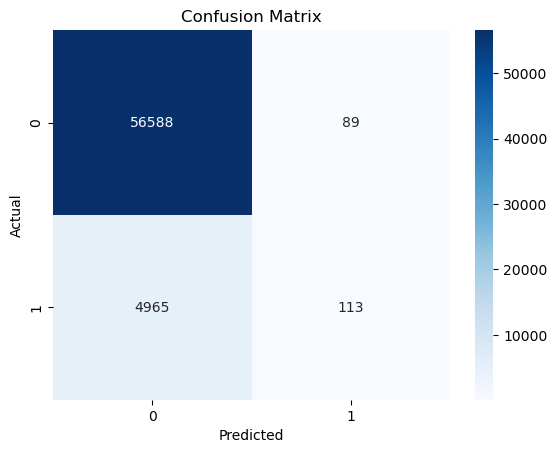

In [235]:
#confusion matrix:
cm = confusion_matrix(y_test, test_y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [236]:
#Save the best model
import joblib

joblib.dump(random_search.best_estimator_, 'best_decision_tree.pkl')

['best_decision_tree.pkl']

In [237]:
#Loading the model:
model = joblib.load('best_decision_tree.pkl')
model

DecisionTreeClassifier(max_depth=5, min_samples_leaf=3, min_samples_split=3)

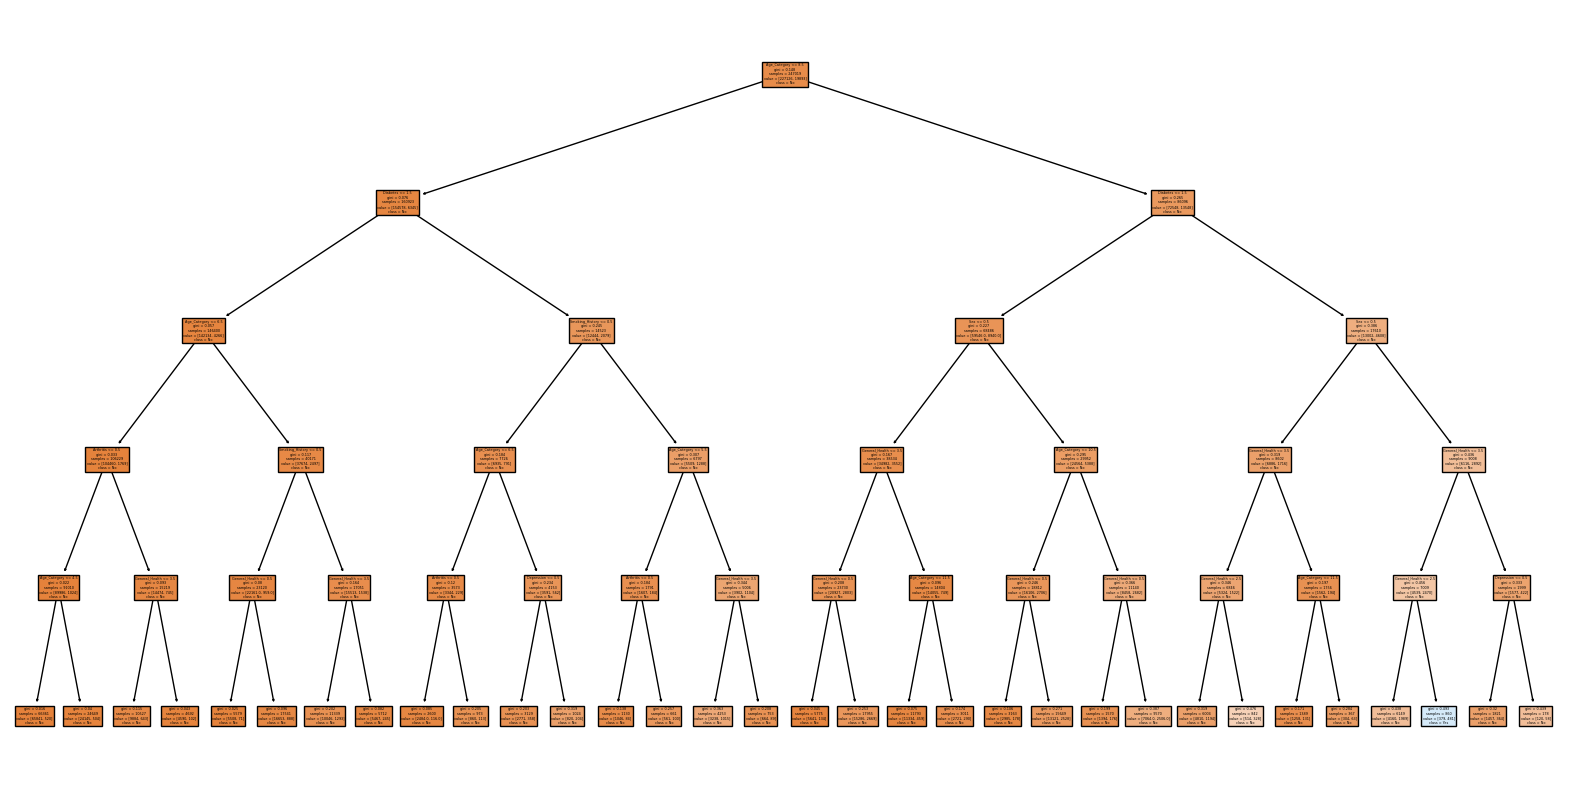

In [238]:
#Plot the Decision Tree
from sklearn import tree

plt.figure(figsize=(20,10))
tree.plot_tree(random_search.best_estimator_, filled=True, feature_names=x_train.columns, class_names=['No', 'Yes'])
plt.show()

## TEST THE PREDICTION

In [240]:
new_data= pd.DataFrame({'General_Health':[4],'Checkup':[3],'Exercise':[1],'Skin_Cancer':[0],'Other_Cancer':[0],'Depression':[1],'Diabetes':[1],'Arthritis':[0],'Sex':[1],'Age_Category':[20],'Height_(cm)':[155],'BMI':[26.78],'Smoking_History':[0],'Alcohol_Consumption':[0],'Fruit_Consumption':[60],'Green_Vegetables_Consumption':[90],'FriedPotato_Consumption':[4]})

In [241]:
prediction= dt.predict(new_data)

In [407]:
print("Heart Disease:",prediction)
if(prediction==1):
    print("Yes")
else:
    print("No")

Heart Disease: [0]
No
